<a href="https://colab.research.google.com/github/ali-talebi/proposal_master/blob/main/Simulation_1403_07_14_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fitter

In [1]:
import pandas as pd
from sklearn.metrics import r2_score
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier
# from fitter import Fitter, get_common_distributions, get_distributions
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
root_path = '/content/drive/MyDrive/Malek_Master/code/Total_Data_Simulation'

In [3]:
total_file_link = []
for i in os.listdir(root_path) :
  total_file_link.append(root_path+f'/{i}')

In [4]:
pd.read_csv(total_file_link[2])

r/R  mean_delta_x  std_delta_x  mean_delta_y  std_delta_y  \
0   0.2001        0.0434       0.0026       -0.0126       0.0013   
1   0.2499       -0.0157       0.0019       -0.0235       0.0031   
2   0.2998       -0.0418       0.0016       -0.0514       0.0053   
3   0.3498       -0.0550       0.0016       -0.0961       0.0091   
4   0.3913       -0.0646       0.0024       -0.1332       0.0133   
5   0.4496       -0.1020       0.0026       -0.1704       0.0173   
6   0.4997       -0.1255       0.0030       -0.2004       0.0207   
7   0.5387       -0.1535       0.0028       -0.2193       0.0230   
8   0.5996       -0.1964       0.0031       -0.2466       0.0273   
9   0.6498       -0.2235       0.0031       -0.2726       0.0316   
10  0.6998       -0.2741       0.0030       -0.2945       0.0354   
11  0.7500       -0.3002       0.0029       -0.3091       0.0391   
12  0.8001       -0.3363       0.0029       -0.3486       0.0430   
13  0.8497       -0.3810       0.0031       -0.3719       0.0474   
14  0.9102       -0.4236       0.0032       -0.3486       0.0526   
15  0.9734       -0.3914       0.0037       -0.3834       0.0581   

    mean_delta_z  std_delta_z  
0        -0.0162       0.0040  
1        -0.0061       0.0079  
2        -0.0781       0.0130  
3        -0.1268       0.0216  
4        -0.1839       0.0303  
5        -0.3251       0.0405  
6        -0.4803       0.0503  
7        -0.6758       0.0569  
8        -0.9893       0.0678  
9        -1.3829       0.0783  
10       -1.7870       0.0876  
11       -2.2590       0.0965  
12       -2.7745       0.1069  
13       -3.3516       0.1185  
14       -4.1247       0.1339  
15       -4.8769       0.1475

In [5]:
total_alpha_content = [ i / 1000 for i in range( 10 ) ]
total_flat_content  = [ i for i in range(1 , 5  ) ]
total_location      = list(range( 5 , 16))

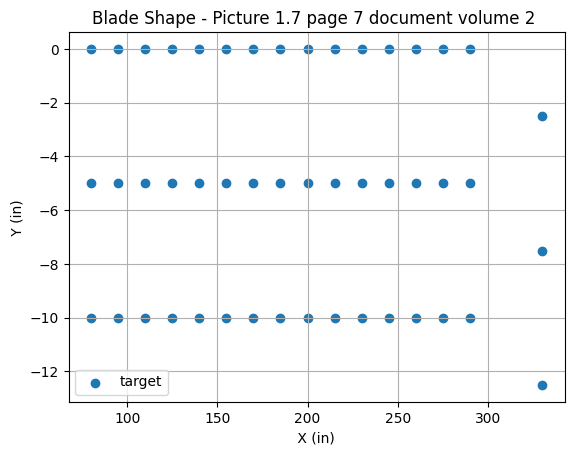

In [6]:
points = []
start_x = 65
start_y = [0 , -5 , -10.0 ]
for i in range(15) :
  start_x +=  15

  for j in range(3) :
    points.append([start_x , start_y[j] , 0 ] )

points.append([330 , -2.5 , 0 ])
points.append([330 , -7.5 , 0 ])
points.append([330 , -12.5 , 0 ])
total_points = np.array(points)
plt.scatter(total_points[ : ,  0 ] , total_points[ : , 1 ] , label = "target" )
plt.legend()
plt.title("Blade Shape - Picture 1.7 page 7 document volume 2 ")
plt.xlabel(" X (in) ")
plt.ylabel(" Y (in) ")
plt.grid()
plt.show()

In [7]:
total_simulation = {
    'bias_correlation' : [] ,
    'betha_0_correlation' : [] ,
    'betha_1_correlation' : [] ,
    'betha_2_correlation' : [] ,
    'betha_3_correlation' : [] ,
    'betha_4_correlation' : [] ,
    'betha_5_correlation' : [] ,
    'alpha' : [] ,
    'flap'  : [] ,
    'accuracy_nav' : [] ,

    'accuracy_random_forest' : [] ,
    'n_estimators_RF' : [] ,
    'max_features_RF' : [] ,
    'max_depth_RF'    : [] ,
    'criterion_RF'    : [] ,

    'accuracy_extra_classifier' : [] ,
    'accuracy_svc_' : [] ,
    'C_svc'         : [] ,
    'kernel_svc'    : [] ,
    'gamma_svc'     : [] ,
    'ann'           : []


}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}



MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T = {
    'mean_bias'    : [] ,
    'std_bias'     : [] ,
    'mean_betha_0' : [] ,
    'std_betha_0'  : [] ,
    'mean_betha_1' : [] ,
    'std_betha_1'  : [] ,
    'mean_betha_2' : [] ,
    'std_betha_2'  : [] ,
    'mean_betha_3' : [] ,
    'std_betha_3'  : [] ,
    'mean_betha_4' : [] ,
    'std_betha_4'  : [] ,
    'mean_betha_5' : [] ,
    'std_betha_5'  : [] ,
}


iter_alpha : 0.0 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9833578192673488
r2_score in Simulation Failt  void  for Each Blade :  0.9844947482104484
Error in Simulation Fault for Each Blade :  1.0740210098859608  --- r2_score Fault S ----  0.9496931091519468
Error in Simulation Fault T  for Each Blade :  1.0740210098859608  --- r2_score Fault T :  -2.0961782792215087
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9824485636157534
r2_score in Simulation Failt  void  for Each Blade :  0.9833066464475789
Error in Simulation Fault for Each Blade :  -1.0111953304129515  --- r2_score Fault S ----  0.9793284315099138
Error in Simulation Fault T  for Each Blade :  -1.0111953304129515  --- r2_score Fault T :  -0.4854272070748584
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9854344624038184
r2_score in Simulation Failt  void  for Each Blade :  0.9845743240579208
Error in Simulation Faul

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.45
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.3113 - loss: 1.4324 - val_acc: 0.3375 - val_loss: 1.3753
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3626 - loss: 1.3681 - val_acc: 0.3500 - val_loss: 1.3338
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3900 - loss: 1.3169 - val_acc: 0.3625 - val_loss: 1.2988
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4531 - loss: 1.3104 - val_acc: 0.3750 - val_loss: 1.2659
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4523 - loss: 1.2113 - val_acc: 0.4000 - val_loss: 1.2426
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4493 - loss: 1.1851 - val_acc: 0.3875 - val_loss: 1.2248
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.5218 - loss: 1.1484 - val_acc: 0.3625 - val_loss: 1.2041
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4233 - loss: 1.1707 - val_acc: 0.3750 - val_loss: 1.1806
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4906 - loss:

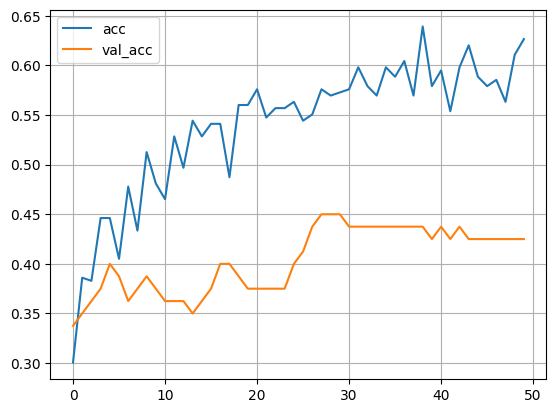

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4273 - loss: 0.9276 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.0 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.976008641066066
r2_score in Simulation Failt  void  for Each Blade :  0.9843930463826555
Error in Simulation Fault for Each Blade :  0.21958573311585017  --- r2_score Fault S ----  0.9941919222333653
Error in Simulation Fault T  for Each Blade :  0.21958573311585017  --- r2_score Fault T :  -1.296918152798725
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9874220934182059
r2_score in Simulation Failt  void  for Each Blade :  0.9695634982378499
Error in Simulation Fault for Each Blade :  2.1309186499518606  --- r2_score Fault S ----  0.9368703034305158
Error in Simulation Fault T  for Each Blade :  2.1309186499518606  --- r2_score Fault T :  -1.3880477358458445
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4875
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.2242 - loss: 1.4662 - val_acc: 0.3250 - val_loss: 1.3851
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2281 - loss: 1.4426 - val_acc: 0.3625 - val_loss: 1.3685
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2885 - loss: 1.3862 - val_acc: 0.3625 - val_loss: 1.3528
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3080 - loss: 1.3753 - val_acc: 0.3875 - val_loss: 1.3397
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4071 - loss: 1.3213 - val_acc: 0.3625 - val_loss: 1.3229
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3664 - loss: 1.2930 - val_acc: 0.3250 - val_loss: 1.3060
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3892 - loss: 1.3011 - val_acc: 0.3125 - val_loss: 1.2893
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4820 - loss: 1.2193 - val_acc: 0.3125 - val_loss: 1.2720
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4133 - loss: 1.2213 - v

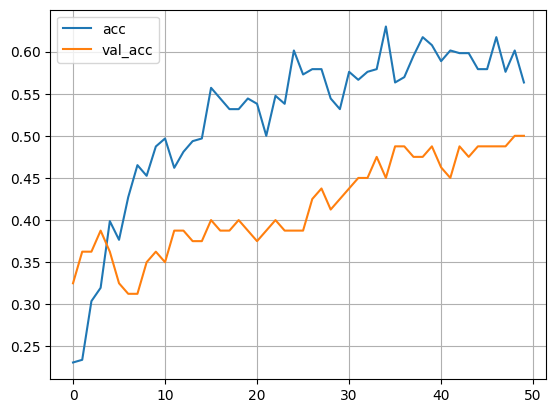

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5039 - loss: 0.8447 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.0 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9716581602699487
r2_score in Simulation Failt  void  for Each Blade :  0.9662775493828988
Error in Simulation Fault for Each Blade :  -0.287170870227335  --- r2_score Fault S ----  0.9833177227999073
Error in Simulation Fault T  for Each Blade :  -0.287170870227335  --- r2_score Fault T :  -3.6398447578891338
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9828959930904754
r2_score in Simulation Failt  void  for Each Blade :  0.9917319099063714
Error in Simulation Fault for Each Blade :  -0.9656123305479405  --- r2_score Fault S ----  0.9766551378183996
Error in Simulation Fault T  for Each Blade :  -0.9656123305479405  --- r2_score Fault T :  -1.6096951282841516
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.2091 - loss: 1.4305 - val_acc: 0.1875 - val_loss: 1.3989
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.1914 - loss: 1.3982 - val_acc: 0.1625 - val_loss: 1.3872
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2843 - loss: 1.3501 - val_acc: 0.1500 - val_loss: 1.3797
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2704 - loss: 1.3717 - val_acc: 0.2250 - val_loss: 1.3685
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3379 - loss: 1.3468 - val_acc: 0.2500 - val_loss: 1.3599
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3521 - loss: 1.3164 - val_acc: 0.3125 - val_loss: 1.3548
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3499 - loss: 1.3176 - val_acc: 0.3125 - val_loss: 1.3472
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3733 - loss: 1.2940 - val_acc: 0.3375 - val_loss: 1.3400
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4888 - loss: 1.2562 - v

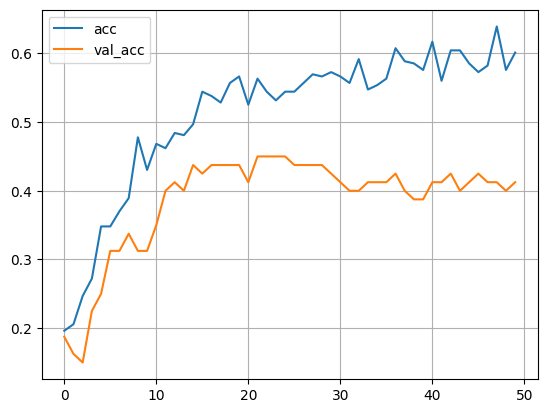

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4328 - loss: 0.9468 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.0 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9845904971270639
r2_score in Simulation Failt  void  for Each Blade :  0.9829062810508327
Error in Simulation Fault for Each Blade :  -2.6795308029420584  --- r2_score Fault S ----  0.967964597945226
Error in Simulation Fault T  for Each Blade :  -2.6795308029420584  --- r2_score Fault T :  -4.65151749721092
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9801250465642732
r2_score in Simulation Failt  void  for Each Blade :  0.9751934361123004
Error in Simulation Fault for Each Blade :  0.5623252547396731  --- r2_score Fault S ----  0.9855143906477584
Error in Simulation Fault T  for Each Blade :  0.5623252547396731  --- r2_score Fault T :  -1.7309096863666529
 ----- for each Blade Simulated ----- 
r2_scor

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4625
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.2811 - loss: 1.4136 - val_acc: 0.3125 - val_loss: 1.3886
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2485 - loss: 1.3911 - val_acc: 0.2875 - val_loss: 1.3762
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3141 - loss: 1.3578 - val_acc: 0.3000 - val_loss: 1.3638
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3348 - loss: 1.3437 - val_acc: 0.3625 - val_loss: 1.3504
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3783 - loss: 1.3128 - val_acc: 0.4125 - val_loss: 1.3373
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4735 - loss: 1.2675 - val_acc: 0.4000 - val_loss: 1.3239
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4688 - loss: 1.2558 - val_acc: 0.4000 - val_loss: 1.3086
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5112 - loss: 1.2314 - val_acc: 0.4250 - val_loss: 1.2923
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4951 - loss: 1.2171

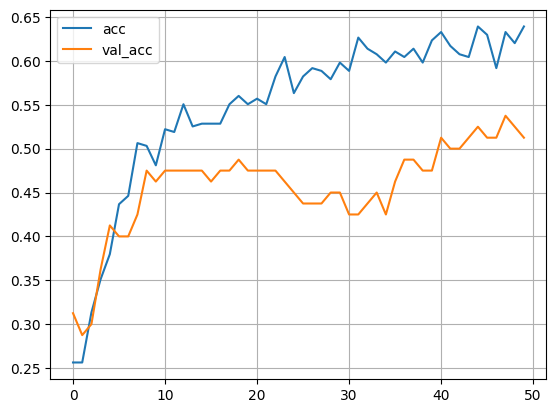

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5375 - loss: 0.8486 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9738244249982787
r2_score in Simulation Failt  void  for Each Blade :  0.978626364678154
Error in Simulation Fault for Each Blade :  1.0068044612843108  --- r2_score Fault S ----  0.9847588577982357
Error in Simulation Fault T  for Each Blade :  1.0068044612843108  --- r2_score Fault T :  -1.1384655920478237
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9797905413705029
r2_score in Simulation Failt  void  for Each Blade :  0.9860633518031511
Error in Simulation Fault for Each Blade :  1.2926038111596938  --- r2_score Fault S ----  0.98001157636655
Error in Simulation Fault T  for Each Blade :  1.2926038111596938  --- r2_score Fault T :  -1.6667748638334903
 ----- for each Blade Simulated ----- 
r2_scor

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.2593 - loss: 1.5212 - val_acc: 0.2500 - val_loss: 1.4329
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2570 - loss: 1.4166 - val_acc: 0.2625 - val_loss: 1.4189
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3216 - loss: 1.3857 - val_acc: 0.2500 - val_loss: 1.4075
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2396 - loss: 1.4121 - val_acc: 0.2250 - val_loss: 1.3976
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2522 - loss: 1.3764 - val_acc: 0.2125 - val_loss: 1.3888
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2806 - loss: 1.3541 - val_acc: 0.2375 - val_loss: 1.3808
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3491 - loss: 1.3302 - val_acc: 0.2750 - val_loss: 1.3724
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2986 - loss: 1.3463 - val_acc: 0.2250 - val_loss: 1.3660
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3265 - loss: 1.3456 - v

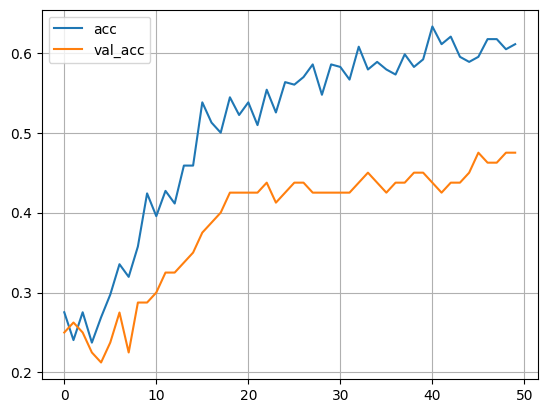

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5188 - loss: 0.9214 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9852486806501657
r2_score in Simulation Failt  void  for Each Blade :  0.9856660248751391
Error in Simulation Fault for Each Blade :  -1.1815173185609678  --- r2_score Fault S ----  0.9853489082805045
Error in Simulation Fault T  for Each Blade :  -1.1815173185609678  --- r2_score Fault T :  -3.1848891807896376
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9621755414025335
r2_score in Simulation Failt  void  for Each Blade :  0.9592147218201672
Error in Simulation Fault for Each Blade :  0.529780578226779  --- r2_score Fault S ----  0.9606031431982207
Error in Simulation Fault T  for Each Blade :  0.529780578226779  --- r2_score Fault T :  -2.6145839129106125
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.2094 - loss: 1.4600 - val_acc: 0.2375 - val_loss: 1.4013
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2512 - loss: 1.4330 - val_acc: 0.2625 - val_loss: 1.3944
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2588 - loss: 1.3970 - val_acc: 0.2875 - val_loss: 1.3853
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3345 - loss: 1.3689 - val_acc: 0.3125 - val_loss: 1.3714
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3012 - loss: 1.3769 - val_acc: 0.3500 - val_loss: 1.3559
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3775 - loss: 1.3446 - val_acc: 0.3875 - val_loss: 1.3407
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3705 - loss: 1.3032 - val_acc: 0.4125 - val_loss: 1.3248
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4203 - loss: 1.3032 - val_acc: 0.4250 - val_loss: 1.3066
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4387 - loss: 1.2580 - v

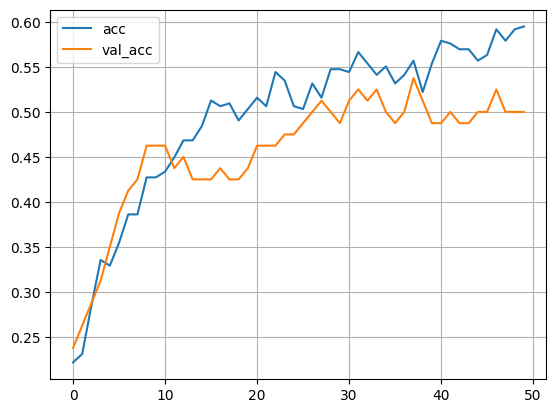

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5391 - loss: 0.8602 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9799010404781017
r2_score in Simulation Failt  void  for Each Blade :  0.973028154454276
Error in Simulation Fault for Each Blade :  -1.1108786428718087  --- r2_score Fault S ----  0.9789866839677952
Error in Simulation Fault T  for Each Blade :  -1.1108786428718087  --- r2_score Fault T :  -0.129662709822584
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9758225742975049
r2_score in Simulation Failt  void  for Each Blade :  0.9824453899027505
Error in Simulation Fault for Each Blade :  -0.9209399122843447  --- r2_score Fault S ----  0.9752644387384287
Error in Simulation Fault T  for Each Blade :  -0.9209399122843447  --- r2_score Fault T :  -0.5497845852828038
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.2188 - loss: 1.5341 - val_acc: 0.2125 - val_loss: 1.4544
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2507 - loss: 1.4636 - val_acc: 0.2125 - val_loss: 1.4246
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2048 - loss: 1.4874 - val_acc: 0.2250 - val_loss: 1.4001
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3103 - loss: 1.3927 - val_acc: 0.2375 - val_loss: 1.3866
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3059 - loss: 1.4067 - val_acc: 0.2750 - val_loss: 1.3737
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2889 - loss: 1.3790 - val_acc: 0.2875 - val_loss: 1.3636
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3604 - loss: 1.3458 - val_acc: 0.3125 - val_loss: 1.3543
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3839 - loss: 1.3130 - val_acc: 0.3250 - val_loss: 1.3471
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3199 - loss: 1.3088 - v

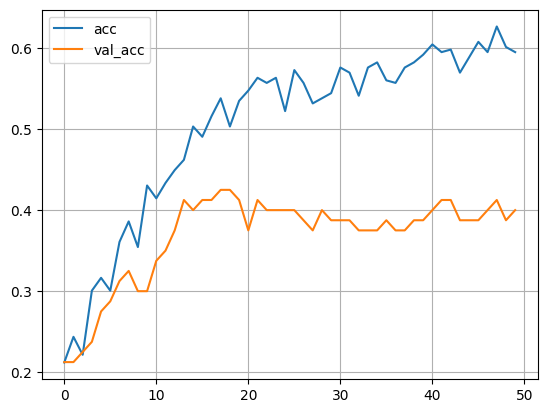

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4422 - loss: 0.9360 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.001 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9831389981705901
r2_score in Simulation Failt  void  for Each Blade :  0.9858879931941295
Error in Simulation Fault for Each Blade :  1.2034989628451576  --- r2_score Fault S ----  0.9732010277323528
Error in Simulation Fault T  for Each Blade :  1.2034989628451576  --- r2_score Fault T :  -2.2552287826920385
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9835706246275933
r2_score in Simulation Failt  void  for Each Blade :  0.985855370542605
Error in Simulation Fault for Each Blade :  -0.39003278623716175  --- r2_score Fault S ----  0.9907267654567591
Error in Simulation Fault T  for Each Blade :  -0.39003278623716175  --- r2_score Fault T :  -0.2977440277315897
 ----- for each Blade Simulated ----- 
r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.45
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.1863 - loss: 1.5099 - val_acc: 0.2125 - val_loss: 1.4544
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2432 - loss: 1.4253 - val_acc: 0.2500 - val_loss: 1.4152
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2696 - loss: 1.3827 - val_acc: 0.2625 - val_loss: 1.3812
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2936 - loss: 1.3616 - val_acc: 0.3250 - val_loss: 1.3498
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3137 - loss: 1.3397 - val_acc: 0.3625 - val_loss: 1.3218
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3606 - loss: 1.3019 - val_acc: 0.4500 - val_loss: 1.2975
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4838 - loss: 1.2343 - val_acc: 0.4750 - val_loss: 1.2715
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4983 - loss: 1.2212 - val_acc: 0.4750 - val_loss: 1.2491
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4741 - loss: 1.2090 

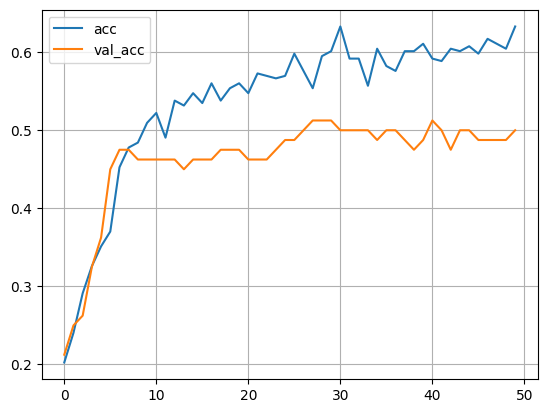

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5156 - loss: 0.8398 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9798901262261419
r2_score in Simulation Failt  void  for Each Blade :  0.9883750646008774
Error in Simulation Fault for Each Blade :  -0.3235909028086279  --- r2_score Fault S ----  0.9906679515974117
Error in Simulation Fault T  for Each Blade :  -0.3235909028086279  --- r2_score Fault T :  -1.043660096093396
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9870916133187538
r2_score in Simulation Failt  void  for Each Blade :  0.9860951016477095
Error in Simulation Fault for Each Blade :  -0.52171633097267  --- r2_score Fault S ----  0.994935644870562
Error in Simulation Fault T  for Each Blade :  -0.52171633097267  --- r2_score Fault T :  -0.8062323665464048
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.2061 - loss: 1.5236 - val_acc: 0.2375 - val_loss: 1.3911
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2043 - loss: 1.4551 - val_acc: 0.2250 - val_loss: 1.3709
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2196 - loss: 1.4313 - val_acc: 0.2125 - val_loss: 1.3578
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2748 - loss: 1.3901 - val_acc: 0.2375 - val_loss: 1.3472
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2376 - loss: 1.3719 - val_acc: 0.2625 - val_loss: 1.3360
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3239 - loss: 1.3327 - val_acc: 0.2875 - val_loss: 1.3258
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3121 - loss: 1.3090 - val_acc: 0.3125 - val_loss: 1.3154
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3694 - loss: 1.2926 - val_acc: 0.3750 - val_loss: 1.3051
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3361 - loss: 1.2924 - v

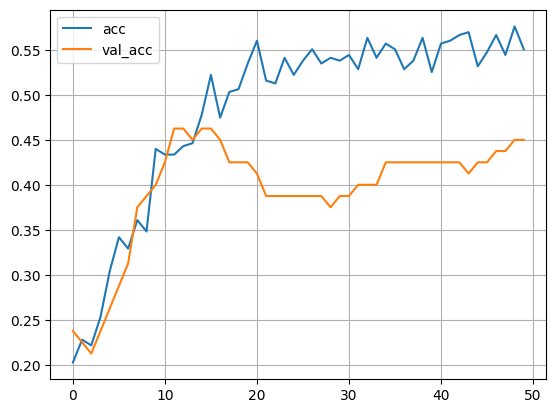

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4867 - loss: 0.9123 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9921664072263728
r2_score in Simulation Failt  void  for Each Blade :  0.9733460994670351
Error in Simulation Fault for Each Blade :  0.2179307801441186  --- r2_score Fault S ----  0.9745581772909592
Error in Simulation Fault T  for Each Blade :  0.2179307801441186  --- r2_score Fault T :  -0.05610105749936278
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9859604186784864
r2_score in Simulation Failt  void  for Each Blade :  0.980598943351682
Error in Simulation Fault for Each Blade :  1.3506491537807905  --- r2_score Fault S ----  0.9821035607300621
Error in Simulation Fault T  for Each Blade :  1.3506491537807905  --- r2_score Fault T :  -2.5197935780800433
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.2719 - loss: 1.5304 - val_acc: 0.2625 - val_loss: 1.4180
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2231 - loss: 1.4922 - val_acc: 0.2625 - val_loss: 1.3839
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2806 - loss: 1.3910 - val_acc: 0.3375 - val_loss: 1.3594
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2827 - loss: 1.3512 - val_acc: 0.3125 - val_loss: 1.3400
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2666 - loss: 1.3651 - val_acc: 0.3875 - val_loss: 1.3236
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3817 - loss: 1.3286 - val_acc: 0.3875 - val_loss: 1.3074
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3894 - loss: 1.2908 - val_acc: 0.4125 - val_loss: 1.2871
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3919 - loss: 1.2830 - val_acc: 0.4000 - val_loss: 1.2697
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4341 - loss: 1.2525 - v

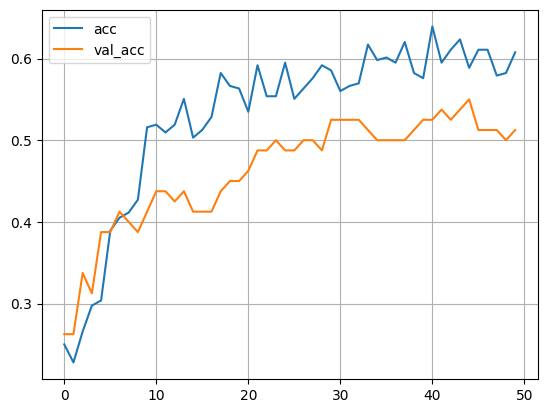

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5258 - loss: 0.9056 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9877906434985158
r2_score in Simulation Failt  void  for Each Blade :  0.9812865322098075
Error in Simulation Fault for Each Blade :  0.3332497131938028  --- r2_score Fault S ----  0.9847131785715357
Error in Simulation Fault T  for Each Blade :  0.3332497131938028  --- r2_score Fault T :  -0.5644734746794129
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.968774668026936
r2_score in Simulation Failt  void  for Each Blade :  0.989783875855637
Error in Simulation Fault for Each Blade :  0.11484182910583174  --- r2_score Fault S ----  0.9715858803429324
Error in Simulation Fault T  for Each Blade :  0.11484182910583174  --- r2_score Fault T :  -0.9671676627147985
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.2371 - loss: 1.4818 - val_acc: 0.2375 - val_loss: 1.4420
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2348 - loss: 1.4735 - val_acc: 0.2750 - val_loss: 1.3980
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2671 - loss: 1.4133 - val_acc: 0.2875 - val_loss: 1.3641
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2849 - loss: 1.3748 - val_acc: 0.2875 - val_loss: 1.3369
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3210 - loss: 1.3611 - val_acc: 0.3000 - val_loss: 1.3121
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3902 - loss: 1.2897 - val_acc: 0.3125 - val_loss: 1.2900
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4165 - loss: 1.2733 - val_acc: 0.3250 - val_loss: 1.2683
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4088 - loss: 1.2315 - val_acc: 0.3625 - val_loss: 1.2476
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3936 - loss: 1.2266 - v

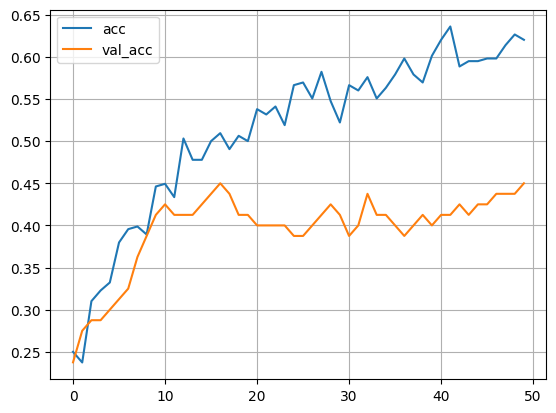

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4906 - loss: 0.8246 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.002 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9832772229236902
r2_score in Simulation Failt  void  for Each Blade :  0.9915015159755729
Error in Simulation Fault for Each Blade :  -0.0188027001668023  --- r2_score Fault S ----  0.986813083436606
Error in Simulation Fault T  for Each Blade :  -0.0188027001668023  --- r2_score Fault T :  -1.7938745084838557
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9918616227379502
r2_score in Simulation Failt  void  for Each Blade :  0.9661737431965376
Error in Simulation Fault for Each Blade :  0.4598326437438498  --- r2_score Fault S ----  0.9902221377659045
Error in Simulation Fault T  for Each Blade :  0.4598326437438498  --- r2_score Fault T :  -0.7349411746623722
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4875
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - acc: 0.1933 - loss: 1.5394 - val_acc: 0.2500 - val_loss: 1.3983
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.2401 - loss: 1.4651 - val_acc: 0.2625 - val_loss: 1.3690
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3315 - loss: 1.3575 - val_acc: 0.2500 - val_loss: 1.3453
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3248 - loss: 1.3342 - val_acc: 0.3250 - val_loss: 1.3249
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3793 - loss: 1.3029 - val_acc: 0.3500 - val_loss: 1.3072
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3922 - loss: 1.2851 - val_acc: 0.3750 - val_loss: 1.2815
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4267 - loss: 1.2306 - val_acc: 0.3750 - val_loss: 1.2561
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3961 - loss: 1.2530 - val_acc: 0.3625 - val_loss: 1.2324
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4937 - loss: 1.1743

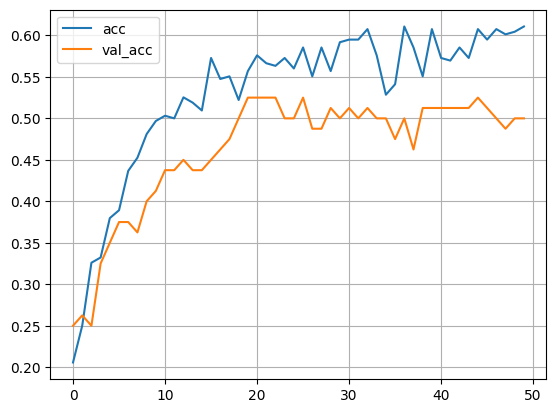

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5234 - loss: 0.8611 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9907826744085434
r2_score in Simulation Failt  void  for Each Blade :  0.9870358580069407
Error in Simulation Fault for Each Blade :  -0.8893626117326132  --- r2_score Fault S ----  0.9887824972360088
Error in Simulation Fault T  for Each Blade :  -0.8893626117326132  --- r2_score Fault T :  -0.8092330528518994
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9802483052786989
r2_score in Simulation Failt  void  for Each Blade :  0.9795692704947759
Error in Simulation Fault for Each Blade :  0.2512209073490683  --- r2_score Fault S ----  0.977946420457652
Error in Simulation Fault T  for Each Blade :  0.2512209073490683  --- r2_score Fault T :  -0.5440113460413183
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.2210 - loss: 1.4772 - val_acc: 0.2375 - val_loss: 1.4078
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2421 - loss: 1.4546 - val_acc: 0.2500 - val_loss: 1.3838
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2942 - loss: 1.4228 - val_acc: 0.2250 - val_loss: 1.3686
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3195 - loss: 1.3749 - val_acc: 0.2375 - val_loss: 1.3528
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3438 - loss: 1.3228 - val_acc: 0.2625 - val_loss: 1.3398
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3271 - loss: 1.3660 - val_acc: 0.2875 - val_loss: 1.3241
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3709 - loss: 1.3110 - val_acc: 0.3000 - val_loss: 1.3092
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3626 - loss: 1.2988 - val_acc: 0.3125 - val_loss: 1.2969
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4112 - loss: 1.2781 - v

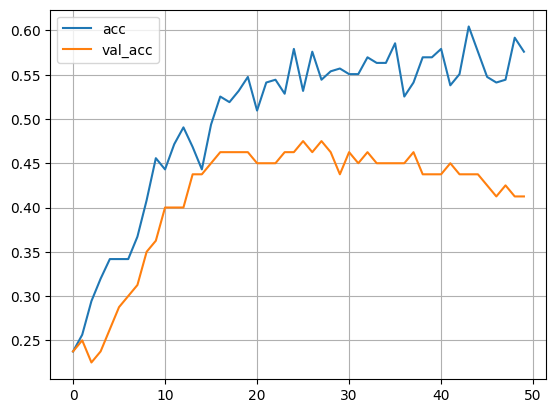

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4445 - loss: 0.9039 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9884168205558875
r2_score in Simulation Failt  void  for Each Blade :  0.9855948853310705
Error in Simulation Fault for Each Blade :  0.3952754788090913  --- r2_score Fault S ----  0.9872154842299355
Error in Simulation Fault T  for Each Blade :  0.3952754788090913  --- r2_score Fault T :  -2.066490319234191
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9824686576704863
r2_score in Simulation Failt  void  for Each Blade :  0.9699999817582355
Error in Simulation Fault for Each Blade :  -0.6285178832314275  --- r2_score Fault S ----  0.9865896536744239
Error in Simulation Fault T  for Each Blade :  -0.6285178832314275  --- r2_score Fault T :  -1.3008328352628533
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.2390 - loss: 1.4432 - val_acc: 0.2875 - val_loss: 1.3813
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.2602 - loss: 1.4224 - val_acc: 0.2625 - val_loss: 1.3711
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2345 - loss: 1.3670 - val_acc: 0.2875 - val_loss: 1.3624
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2938 - loss: 1.3853 - val_acc: 0.3500 - val_loss: 1.3513
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3446 - loss: 1.3213 - val_acc: 0.3500 - val_loss: 1.3385
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3398 - loss: 1.3307 - val_acc: 0.4125 - val_loss: 1.3265
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4069 - loss: 1.3027 - val_acc: 0.4375 - val_loss: 1.3131
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3694 - loss: 1.2899 - val_acc: 0.4125 - val_loss: 1.2973
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4331 - loss: 1.2

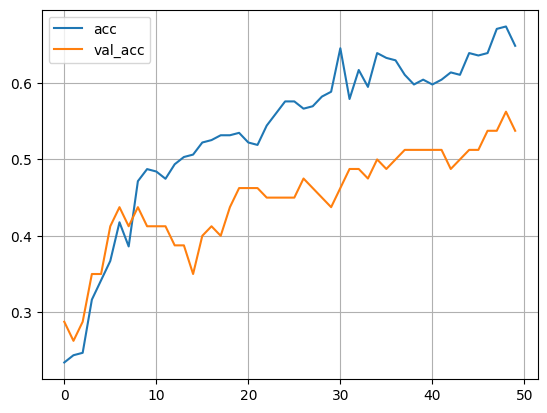

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5695 - loss: 0.8534 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9779657071244698
r2_score in Simulation Failt  void  for Each Blade :  0.989395439837054
Error in Simulation Fault for Each Blade :  2.140954302775228  --- r2_score Fault S ----  0.9606029907105085
Error in Simulation Fault T  for Each Blade :  2.140954302775228  --- r2_score Fault T :  0.3577487815261017
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9877344666885289
r2_score in Simulation Failt  void  for Each Blade :  0.9836818612117263
Error in Simulation Fault for Each Blade :  1.4998321067087108  --- r2_score Fault S ----  0.9750654869262638
Error in Simulation Fault T  for Each Blade :  1.4998321067087108  --- r2_score Fault T :  -1.565878510089354
 ----- for each Blade Simulated ----- 
r2_score 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.525
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.2824 - loss: 1.5741 - val_acc: 0.2250 - val_loss: 1.5640
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2777 - loss: 1.4686 - val_acc: 0.2375 - val_loss: 1.4936
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3388 - loss: 1.4348 - val_acc: 0.2750 - val_loss: 1.4367
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3275 - loss: 1.3674 - val_acc: 0.3000 - val_loss: 1.3959
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3918 - loss: 1.3317 - val_acc: 0.3375 - val_loss: 1.3615
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3433 - loss: 1.3722 - val_acc: 0.3625 - val_loss: 1.3281
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3641 - loss: 1.2977 - val_acc: 0.3500 - val_loss: 1.3023
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4155 - loss: 1.2609 - val_acc: 0.3750 - val_loss: 1.2792
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4362 - loss: 1.2432 - v

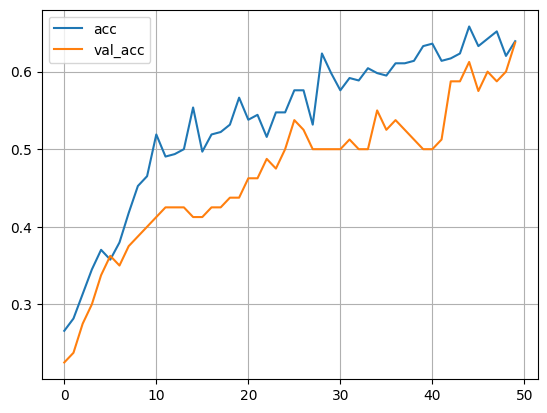

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.6313 - loss: 0.8195 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.003 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9904436086867625
r2_score in Simulation Failt  void  for Each Blade :  0.9782279429244826
Error in Simulation Fault for Each Blade :  -0.6686928350751145  --- r2_score Fault S ----  0.9836971654968797
Error in Simulation Fault T  for Each Blade :  -0.6686928350751145  --- r2_score Fault T :  -0.447045802035003
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9843737498279495
r2_score in Simulation Failt  void  for Each Blade :  0.9856283505664281
Error in Simulation Fault for Each Blade :  -0.6273728889171877  --- r2_score Fault S ----  0.984867963571875
Error in Simulation Fault T  for Each Blade :  -0.6273728889171877  --- r2_score Fault T :  -0.6606312987261656
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.2461 - loss: 1.4066 - val_acc: 0.3125 - val_loss: 1.3726
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3479 - loss: 1.3591 - val_acc: 0.3250 - val_loss: 1.3593
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2351 - loss: 1.3779 - val_acc: 0.3375 - val_loss: 1.3464
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3089 - loss: 1.3447 - val_acc: 0.2875 - val_loss: 1.3354
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3833 - loss: 1.3065 - val_acc: 0.2625 - val_loss: 1.3251
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3828 - loss: 1.2950 - val_acc: 0.3125 - val_loss: 1.3105
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4335 - loss: 1.2701 - val_acc: 0.3000 - val_loss: 1.2955
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4247 - loss: 1.2298 - val_acc: 0.3250 - val_loss: 1.2784
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.5242 - loss: 1.1847 - v

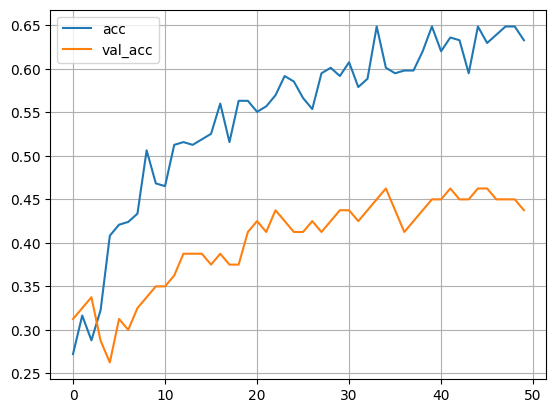

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4531 - loss: 0.8803 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9854114707087146
r2_score in Simulation Failt  void  for Each Blade :  0.9724259708923287
Error in Simulation Fault for Each Blade :  0.913879546207931  --- r2_score Fault S ----  0.9870310852962038
Error in Simulation Fault T  for Each Blade :  0.913879546207931  --- r2_score Fault T :  -0.5347106585507064
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9776094561312192
r2_score in Simulation Failt  void  for Each Blade :  0.9524870449634406
Error in Simulation Fault for Each Blade :  1.4834655230200164  --- r2_score Fault S ----  0.9582144442315215
Error in Simulation Fault T  for Each Blade :  1.4834655230200164  --- r2_score Fault T :  -1.1358703959476557
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.425
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.1291 - loss: 1.4701 - val_acc: 0.1250 - val_loss: 1.5043
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.1312 - loss: 1.4732 - val_acc: 0.1375 - val_loss: 1.4799
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2302 - loss: 1.4176 - val_acc: 0.1500 - val_loss: 1.4620
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2158 - loss: 1.4017 - val_acc: 0.1875 - val_loss: 1.4480
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2595 - loss: 1.3832 - val_acc: 0.2125 - val_loss: 1.4316
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2467 - loss: 1.3886 - val_acc: 0.1875 - val_loss: 1.4171
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3311 - loss: 1.3576 - val_acc: 0.2000 - val_loss: 1.4052
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3083 - loss: 1.3496 - val_acc: 0.2375 - val_loss: 1.3927
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3248 - loss: 1.3533 - v

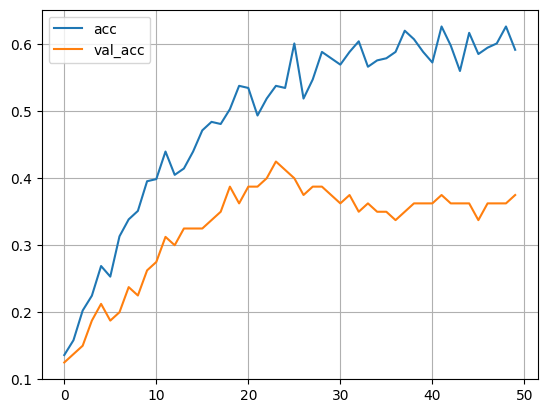

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3906 - loss: 0.9511 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.985180873976444
r2_score in Simulation Failt  void  for Each Blade :  0.9772483583020457
Error in Simulation Fault for Each Blade :  0.6643563540892661  --- r2_score Fault S ----  0.9759724135442911
Error in Simulation Fault T  for Each Blade :  0.6643563540892661  --- r2_score Fault T :  -0.8358952631845353
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9786501966063902
r2_score in Simulation Failt  void  for Each Blade :  0.9550815648581855
Error in Simulation Fault for Each Blade :  -1.1397962406085878  --- r2_score Fault S ----  0.9793650078071617
Error in Simulation Fault T  for Each Blade :  -1.1397962406085878  --- r2_score Fault T :  -0.37294466940009574
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.425
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.2029 - loss: 1.5365 - val_acc: 0.3000 - val_loss: 1.3539
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2691 - loss: 1.4425 - val_acc: 0.3125 - val_loss: 1.3172
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3086 - loss: 1.3756 - val_acc: 0.3500 - val_loss: 1.2936
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3224 - loss: 1.3550 - val_acc: 0.4125 - val_loss: 1.2729
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4263 - loss: 1.2744 - val_acc: 0.4250 - val_loss: 1.2516
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4067 - loss: 1.2681 - val_acc: 0.4250 - val_loss: 1.2302
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3976 - loss: 1.2406 - val_acc: 0.4375 - val_loss: 1.2091
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4017 - loss: 1.2484 - val_acc: 0.4250 - val_loss: 1.1891
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4300 - loss: 1.1930 - v

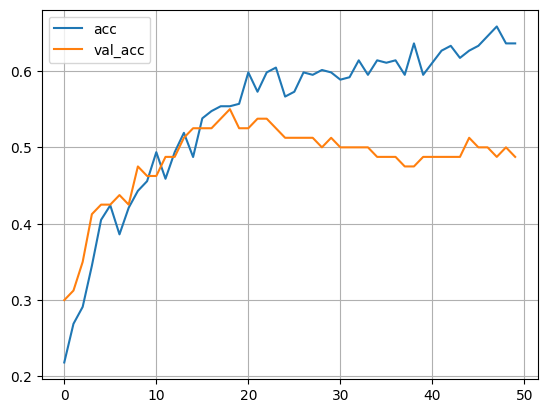

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5367 - loss: 0.8570 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9737948328974344
r2_score in Simulation Failt  void  for Each Blade :  0.9702569359423311
Error in Simulation Fault for Each Blade :  -0.13115572755874716  --- r2_score Fault S ----  0.9878405648056464
Error in Simulation Fault T  for Each Blade :  -0.13115572755874716  --- r2_score Fault T :  -1.235333941740782
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.972904697436522
r2_score in Simulation Failt  void  for Each Blade :  0.9742115683065348
Error in Simulation Fault for Each Blade :  1.4192081052160113  --- r2_score Fault S ----  0.9814332980555742
Error in Simulation Fault T  for Each Blade :  1.4192081052160113  --- r2_score Fault T :  -2.3562252791702947
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.2998 - loss: 1.3933 - val_acc: 0.1875 - val_loss: 1.4132
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3491 - loss: 1.3694 - val_acc: 0.2750 - val_loss: 1.3959
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3099 - loss: 1.3667 - val_acc: 0.2875 - val_loss: 1.3805
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3633 - loss: 1.3555 - val_acc: 0.3125 - val_loss: 1.3682
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3838 - loss: 1.3460 - val_acc: 0.3250 - val_loss: 1.3550
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3841 - loss: 1.3151 - val_acc: 0.3250 - val_loss: 1.3417
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4266 - loss: 1.2755 - val_acc: 0.3125 - val_loss: 1.3291
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4337 - loss: 1.2648 - val_acc: 0.3375 - val_loss: 1.3172
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.5127 - loss: 1.2056 -

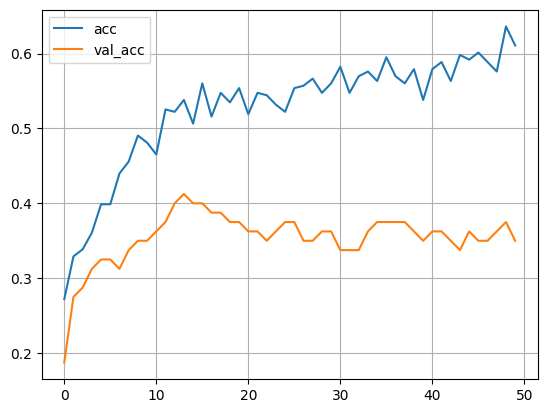

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.3938 - loss: 0.9287 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.004 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.963306663882147
r2_score in Simulation Failt  void  for Each Blade :  0.9754831522375759
Error in Simulation Fault for Each Blade :  0.2023835247311805  --- r2_score Fault S ----  0.9877716268562639
Error in Simulation Fault T  for Each Blade :  0.2023835247311805  --- r2_score Fault T :  -0.09222087396852618
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9812346020392776
r2_score in Simulation Failt  void  for Each Blade :  0.98032749684132
Error in Simulation Fault for Each Blade :  -0.5659904287391362  --- r2_score Fault S ----  0.9813879769521726
Error in Simulation Fault T  for Each Blade :  -0.5659904287391362  --- r2_score Fault T :  -2.042564307455212
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.2461 - loss: 1.4496 - val_acc: 0.1875 - val_loss: 1.5113
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2599 - loss: 1.4286 - val_acc: 0.2000 - val_loss: 1.4762
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2580 - loss: 1.3967 - val_acc: 0.2250 - val_loss: 1.4580
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2662 - loss: 1.3941 - val_acc: 0.2000 - val_loss: 1.4448
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2995 - loss: 1.3851 - val_acc: 0.2125 - val_loss: 1.4347
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3266 - loss: 1.3630 - val_acc: 0.1875 - val_loss: 1.4300
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3760 - loss: 1.3208 - val_acc: 0.2000 - val_loss: 1.4219
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3815 - loss: 1.3622 - val_acc: 0.2250 - val_loss: 1.4134
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3779 - loss: 1.3521 - v

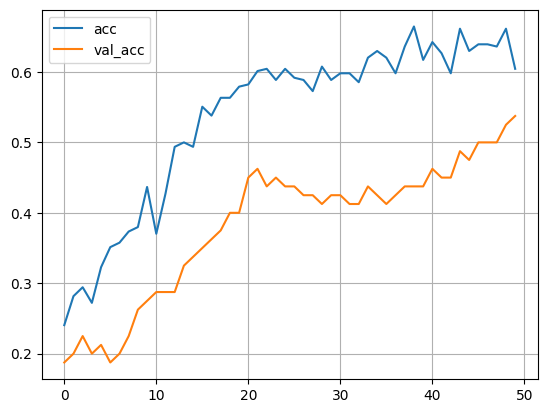

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5266 - loss: 0.8617 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9788194968758619
r2_score in Simulation Failt  void  for Each Blade :  0.9791207954570249
Error in Simulation Fault for Each Blade :  2.373220082983991  --- r2_score Fault S ----  0.9635136922084775
Error in Simulation Fault T  for Each Blade :  2.373220082983991  --- r2_score Fault T :  -1.3673530145855919
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9878897682933995
r2_score in Simulation Failt  void  for Each Blade :  0.9814833105109068
Error in Simulation Fault for Each Blade :  -0.7720411412870383  --- r2_score Fault S ----  0.9825608527485143
Error in Simulation Fault T  for Each Blade :  -0.7720411412870383  --- r2_score Fault T :  -3.7909017706227877
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.2595 - loss: 1.4160 - val_acc: 0.2750 - val_loss: 1.4332
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3054 - loss: 1.3673 - val_acc: 0.3000 - val_loss: 1.4122
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3142 - loss: 1.3558 - val_acc: 0.3375 - val_loss: 1.3931
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3367 - loss: 1.3519 - val_acc: 0.3750 - val_loss: 1.3781
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3812 - loss: 1.3312 - val_acc: 0.4000 - val_loss: 1.3624
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4245 - loss: 1.3017 - val_acc: 0.4000 - val_loss: 1.3461
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4198 - loss: 1.2751 - val_acc: 0.4125 - val_loss: 1.3295
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4618 - loss: 1.2585 - val_acc: 0.4125 - val_loss: 1.3130
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4620 - loss: 1.2440 - v

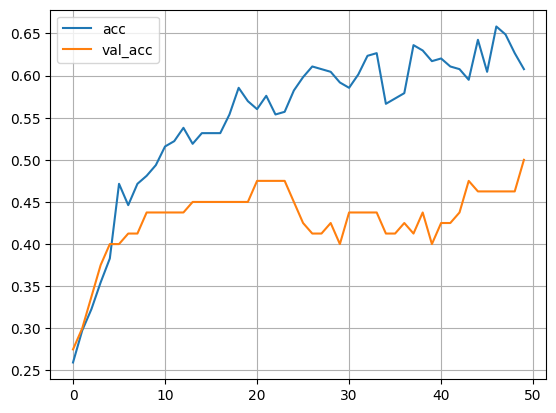

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5117 - loss: 0.8577 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9883030662963104
r2_score in Simulation Failt  void  for Each Blade :  0.9843031194228606
Error in Simulation Fault for Each Blade :  1.9253936167594308  --- r2_score Fault S ----  0.9630352088278052
Error in Simulation Fault T  for Each Blade :  1.9253936167594308  --- r2_score Fault T :  -0.8732457250776082
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.967990892185712
r2_score in Simulation Failt  void  for Each Blade :  0.9844651277899492
Error in Simulation Fault for Each Blade :  1.8147768420776087  --- r2_score Fault S ----  0.9721091246449132
Error in Simulation Fault T  for Each Blade :  1.8147768420776087  --- r2_score Fault T :  -4.995846819703957
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.2135 - loss: 1.5062 - val_acc: 0.1875 - val_loss: 1.4873
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2497 - loss: 1.4610 - val_acc: 0.2250 - val_loss: 1.4412
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2961 - loss: 1.4588 - val_acc: 0.2750 - val_loss: 1.4058
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3496 - loss: 1.3944 - val_acc: 0.3250 - val_loss: 1.3756
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3489 - loss: 1.3512 - val_acc: 0.3500 - val_loss: 1.3532
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3879 - loss: 1.3725 - val_acc: 0.4250 - val_loss: 1.3293
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4286 - loss: 1.3259 - val_acc: 0.4500 - val_loss: 1.3092
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4080 - loss: 1.3161 - val_acc: 0.4750 - val_loss: 1.2885
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4632 - loss: 1.2866 - 

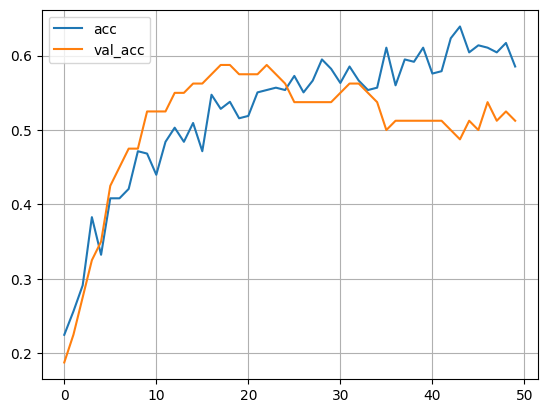

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5375 - loss: 0.8946 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.981840883371232
r2_score in Simulation Failt  void  for Each Blade :  0.981322472220976
Error in Simulation Fault for Each Blade :  0.39954530783161957  --- r2_score Fault S ----  0.9716929572921543
Error in Simulation Fault T  for Each Blade :  0.39954530783161957  --- r2_score Fault T :  -0.9380195016818453
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9936279036720371
r2_score in Simulation Failt  void  for Each Blade :  0.9899415065666513
Error in Simulation Fault for Each Blade :  -4.250321030166387  --- r2_score Fault S ----  0.9634866053078249
Error in Simulation Fault T  for Each Blade :  -4.250321030166387  --- r2_score Fault T :  -0.6724969917002288
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.425
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.1996 - loss: 1.5122 - val_acc: 0.2375 - val_loss: 1.4019
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2104 - loss: 1.4689 - val_acc: 0.2125 - val_loss: 1.3869
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2392 - loss: 1.4164 - val_acc: 0.2250 - val_loss: 1.3769
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.2890 - loss: 1.3953 - val_acc: 0.2625 - val_loss: 1.3678
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3343 - loss: 1.3479 - val_acc: 0.3250 - val_loss: 1.3570
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3568 - loss: 1.3393 - val_acc: 0.3375 - val_loss: 1.3436
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3463 - loss: 1.3211 - val_acc: 0.3375 - val_loss: 1.3302
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3348 - loss: 1.3344 - val_acc: 0.3500 - val_loss: 1.3155
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4206 - loss: 1.2752 - v

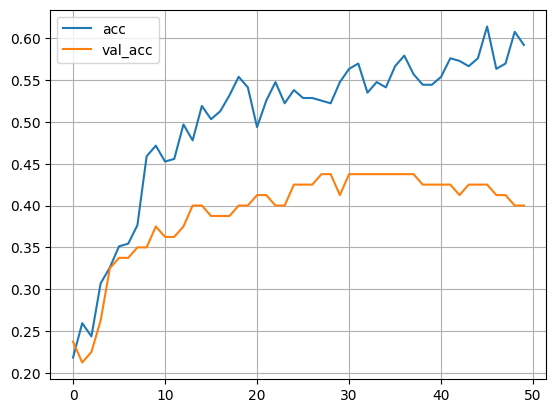

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4500 - loss: 0.9360 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.005 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9750011740102765
r2_score in Simulation Failt  void  for Each Blade :  0.9801508273951973
Error in Simulation Fault for Each Blade :  -0.5135415787063327  --- r2_score Fault S ----  0.9875739431010903
Error in Simulation Fault T  for Each Blade :  -0.5135415787063327  --- r2_score Fault T :  -1.3134476707258003
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9702892774837861
r2_score in Simulation Failt  void  for Each Blade :  0.9868687190190225
Error in Simulation Fault for Each Blade :  1.5535215627337182  --- r2_score Fault S ----  0.9608535807526993
Error in Simulation Fault T  for Each Blade :  1.5535215627337182  --- r2_score Fault T :  -1.1117612897256497
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4875
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.2919 - loss: 1.4496 - val_acc: 0.2750 - val_loss: 1.4937
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2874 - loss: 1.4123 - val_acc: 0.3000 - val_loss: 1.4534
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3335 - loss: 1.3477 - val_acc: 0.2875 - val_loss: 1.4194
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3515 - loss: 1.3345 - val_acc: 0.3250 - val_loss: 1.3915
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3846 - loss: 1.3311 - val_acc: 0.3500 - val_loss: 1.3662
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.3900 - loss: 1.3072 - val_acc: 0.3750 - val_loss: 1.3412
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3755 - loss: 1.2635 - val_acc: 0.4250 - val_loss: 1.3202
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.4347 - loss: 1.2735 - val_acc: 0.4375 - val_loss: 1.3001
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4403 - loss: 1.2340 - v

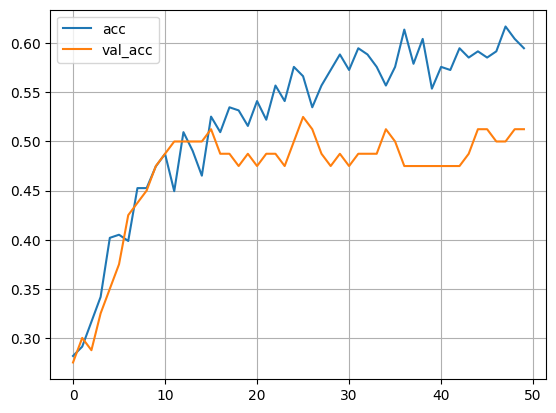

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5141 - loss: 0.8991 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9612555025322177
r2_score in Simulation Failt  void  for Each Blade :  0.9770880271004356
Error in Simulation Fault for Each Blade :  0.8257485516798813  --- r2_score Fault S ----  0.9713305733743688
Error in Simulation Fault T  for Each Blade :  0.8257485516798813  --- r2_score Fault T :  -3.693855212565679
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.975206022593424
r2_score in Simulation Failt  void  for Each Blade :  0.9819757218844537
Error in Simulation Fault for Each Blade :  -0.8917214709014076  --- r2_score Fault S ----  0.9888838624136335
Error in Simulation Fault T  for Each Blade :  -0.8917214709014076  --- r2_score Fault T :  -2.239925014594473
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
33 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4875
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.3617 - loss: 1.3413 - val_acc: 0.2375 - val_loss: 1.3825
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4172 - loss: 1.2961 - val_acc: 0.2500 - val_loss: 1.3616
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4285 - loss: 1.2976 - val_acc: 0.2625 - val_loss: 1.3426
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4503 - loss: 1.2621 - val_acc: 0.2750 - val_loss: 1.3227
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4687 - loss: 1.2447 - val_acc: 0.3000 - val_loss: 1.3014
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4657 - loss: 1.2068 - val_acc: 0.3125 - val_loss: 1.2800
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.5206 - loss: 1.1698 - val_acc: 0.3250 - val_loss: 1.2562
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5544 - loss: 1.1353 - val_acc: 0.3125 - val_loss: 1.2318
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5241 - loss: 1.1426 - v

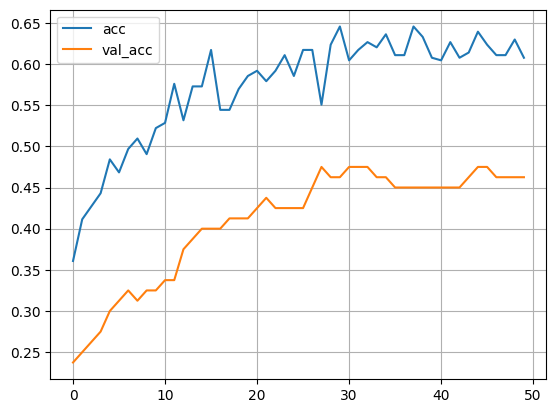

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4812 - loss: 0.9489 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9567732131776383
r2_score in Simulation Failt  void  for Each Blade :  0.9773358551019571
Error in Simulation Fault for Each Blade :  -1.0626564159350107  --- r2_score Fault S ----  0.9893570129942554
Error in Simulation Fault T  for Each Blade :  -1.0626564159350107  --- r2_score Fault T :  -0.21774838925469653
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9871679171814729
r2_score in Simulation Failt  void  for Each Blade :  0.9808565878815663
Error in Simulation Fault for Each Blade :  -0.016646909047536074  --- r2_score Fault S ----  0.997248201066626
Error in Simulation Fault T  for Each Blade :  -0.016646909047536074  --- r2_score Fault T :  -1.5457729648225782
 ----- for each Blade Simulated ---

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.2541 - loss: 1.4639 - val_acc: 0.1625 - val_loss: 1.4747
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3002 - loss: 1.4228 - val_acc: 0.1250 - val_loss: 1.4604
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2849 - loss: 1.4076 - val_acc: 0.1250 - val_loss: 1.4476
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2541 - loss: 1.3933 - val_acc: 0.1625 - val_loss: 1.4355
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2879 - loss: 1.3731 - val_acc: 0.1750 - val_loss: 1.4248
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3040 - loss: 1.3675 - val_acc: 0.2000 - val_loss: 1.4138
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3414 - loss: 1.3656 - val_acc: 0.2375 - val_loss: 1.3994
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3730 - loss: 1.3275 - val_acc: 0.2250 - val_loss: 1.3843
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4142 - loss: 1.30

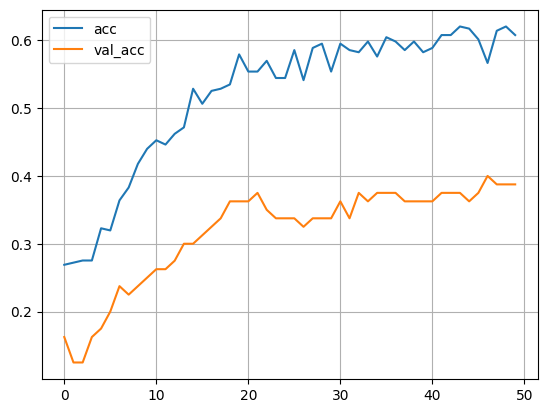

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4125 - loss: 0.9383 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9707352562665215
r2_score in Simulation Failt  void  for Each Blade :  0.9697657844409487
Error in Simulation Fault for Each Blade :  -0.0877405186416671  --- r2_score Fault S ----  0.9796311046039368
Error in Simulation Fault T  for Each Blade :  -0.0877405186416671  --- r2_score Fault T :  -1.4644603430785246
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9848782984314276
r2_score in Simulation Failt  void  for Each Blade :  0.978932091314958
Error in Simulation Fault for Each Blade :  -1.1308630229054342  --- r2_score Fault S ----  0.9738899788813936
Error in Simulation Fault T  for Each Blade :  -1.1308630229054342  --- r2_score Fault T :  -0.8980119827534854
 ----- for each Blade Simulated ----- 
r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

accuracy accuracy_random_forest  : 0.375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - acc: 0.2640 - loss: 1.4185 - val_acc: 0.2500 - val_loss: 1.4502
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2580 - loss: 1.4038 - val_acc: 0.2375 - val_loss: 1.4196
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2877 - loss: 1.4152 - val_acc: 0.3000 - val_loss: 1.3961
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3730 - loss: 1.3574 - val_acc: 0.3375 - val_loss: 1.3755
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3907 - loss: 1.3252 - val_acc: 0.3750 - val_loss: 1.3590
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.4051 - loss: 1.2950 - val_acc: 0.4000 - val_loss: 1.3421
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4099 - loss: 1.2960 - val_acc: 0.4375 - val_loss: 1.3244
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4229 - loss: 1.2673 - val_acc: 0.4625 - val_loss: 1.3064
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4045 - loss: 1.2

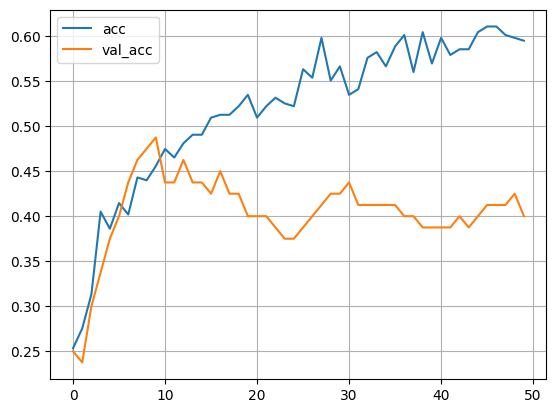

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4266 - loss: 0.9180 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.006 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9835279075536844
r2_score in Simulation Failt  void  for Each Blade :  0.9813909110191056
Error in Simulation Fault for Each Blade :  -0.7596247278200183  --- r2_score Fault S ----  0.984402494621372
Error in Simulation Fault T  for Each Blade :  -0.7596247278200183  --- r2_score Fault T :  -1.2922757032976233
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9947814087175285
r2_score in Simulation Failt  void  for Each Blade :  0.9627264913391849
Error in Simulation Fault for Each Blade :  -1.779052136147465  --- r2_score Fault S ----  0.9686080836987758
Error in Simulation Fault T  for Each Blade :  -1.779052136147465  --- r2_score Fault T :  -2.9293339187535192
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - acc: 0.1052 - loss: 1.5916 - val_acc: 0.1375 - val_loss: 1.5348
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.1509 - loss: 1.5322 - val_acc: 0.1250 - val_loss: 1.4888
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.1718 - loss: 1.4907 - val_acc: 0.1375 - val_loss: 1.4528
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2179 - loss: 1.4297 - val_acc: 0.1625 - val_loss: 1.4256
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2375 - loss: 1.4377 - val_acc: 0.2250 - val_loss: 1.4034
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3040 - loss: 1.3613 - val_acc: 0.2500 - val_loss: 1.3867
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3660 - loss: 1.3256 - val_acc: 0.3125 - val_loss: 1.3702
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4483 - loss: 1.3282 - val_acc: 0.3250 - val_loss: 1.3553
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4316 - loss: 1.3

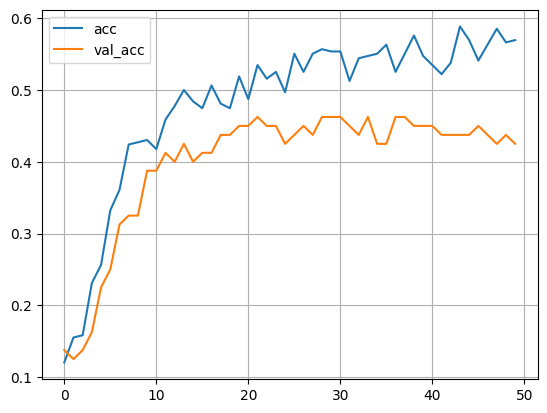

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4508 - loss: 0.8944 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.990063030431937
r2_score in Simulation Failt  void  for Each Blade :  0.9863424846568659
Error in Simulation Fault for Each Blade :  -1.5585413046043421  --- r2_score Fault S ----  0.989052660716841
Error in Simulation Fault T  for Each Blade :  -1.5585413046043421  --- r2_score Fault T :  -1.0398813230295474
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9757616503716058
r2_score in Simulation Failt  void  for Each Blade :  0.9860665142659518
Error in Simulation Fault for Each Blade :  -2.663089026416838  --- r2_score Fault S ----  0.9592077292742309
Error in Simulation Fault T  for Each Blade :  -2.663089026416838  --- r2_score Fault T :  -0.6730614121322187
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - acc: 0.1924 - loss: 1.5248 - val_acc: 0.2375 - val_loss: 1.4557
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2373 - loss: 1.5054 - val_acc: 0.3375 - val_loss: 1.4258
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2075 - loss: 1.4591 - val_acc: 0.3500 - val_loss: 1.4037
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3190 - loss: 1.4175 - val_acc: 0.3750 - val_loss: 1.3835
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3435 - loss: 1.3756 - val_acc: 0.3750 - val_loss: 1.3629
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3410 - loss: 1.3377 - val_acc: 0.3875 - val_loss: 1.3452
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3688 - loss: 1.3235 - val_acc: 0.4500 - val_loss: 1.3294
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4086 - loss: 1.2932 - val_acc: 0.4500 - val_loss: 1.3095
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4510 - loss: 1.2663 - v

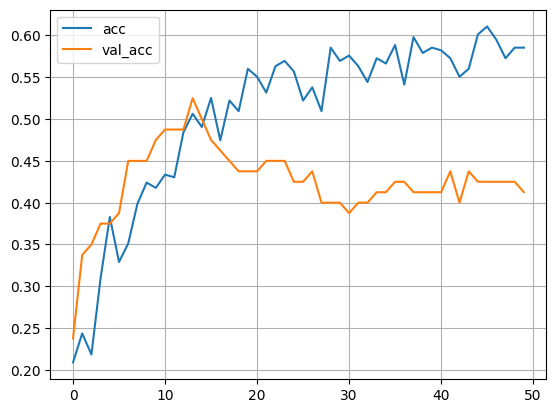

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4289 - loss: 0.9216 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9824182778136638
r2_score in Simulation Failt  void  for Each Blade :  0.9676384983811622
Error in Simulation Fault for Each Blade :  0.35156920056706387  --- r2_score Fault S ----  0.988201663745804
Error in Simulation Fault T  for Each Blade :  0.35156920056706387  --- r2_score Fault T :  -1.1500705500551032
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9866081660863453
r2_score in Simulation Failt  void  for Each Blade :  0.9708778866728827
Error in Simulation Fault for Each Blade :  1.300864767051947  --- r2_score Fault S ----  0.9814154867340943
Error in Simulation Fault T  for Each Blade :  1.300864767051947  --- r2_score Fault T :  0.05436487711128446
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.2058 - loss: 1.4517 - val_acc: 0.1875 - val_loss: 1.3958
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2198 - loss: 1.4303 - val_acc: 0.1875 - val_loss: 1.3901
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.2816 - loss: 1.3978 - val_acc: 0.2250 - val_loss: 1.3858
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2572 - loss: 1.4040 - val_acc: 0.2500 - val_loss: 1.3805
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2581 - loss: 1.3928 - val_acc: 0.2750 - val_loss: 1.3751
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2577 - loss: 1.3666 - val_acc: 0.2750 - val_loss: 1.3704
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2870 - loss: 1.3678 - val_acc: 0.3000 - val_loss: 1.3642
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3326 - loss: 1.3711 - val_acc: 0.3500 - val_loss: 1.3580
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3708 - loss: 1.3381

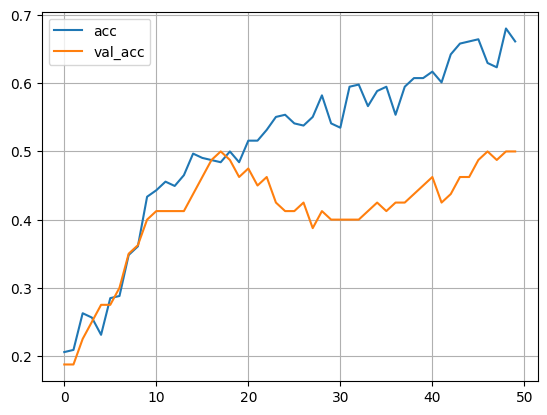

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.5312 - loss: 0.8783 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9815460349025056
r2_score in Simulation Failt  void  for Each Blade :  0.9855463837204878
Error in Simulation Fault for Each Blade :  -1.0681129730666676  --- r2_score Fault S ----  0.9802759697876896
Error in Simulation Fault T  for Each Blade :  -1.0681129730666676  --- r2_score Fault T :  -0.588278259413695
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9878692154749813
r2_score in Simulation Failt  void  for Each Blade :  0.9845894143883724
Error in Simulation Fault for Each Blade :  -2.525284969028637  --- r2_score Fault S ----  0.9622488593451797
Error in Simulation Fault T  for Each Blade :  -2.525284969028637  --- r2_score Fault T :  -2.0095682843791467
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
26 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4875
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - acc: 0.1763 - loss: 1.5315 - val_acc: 0.1625 - val_loss: 1.5149
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.2030 - loss: 1.4947 - val_acc: 0.1750 - val_loss: 1.4841
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.1969 - loss: 1.4378 - val_acc: 0.1875 - val_loss: 1.4593
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.1744 - loss: 1.4295 - val_acc: 0.2500 - val_loss: 1.4356
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.2635 - loss: 1.3971 - val_acc: 0.2750 - val_loss: 1.4175
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3182 - loss: 1.3760 - val_acc: 0.3000 - val_loss: 1.4062
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3301 - loss: 1.3867 - val_acc: 0.3125 - val_loss: 1.3945
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3366 - loss: 1.3514 - val_acc: 0.3250 - val_loss: 1.3814
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3537 - loss: 1.

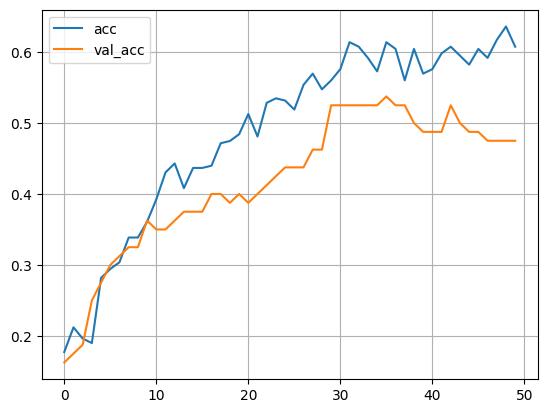

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5148 - loss: 0.9467 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.007 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9801310191544628
r2_score in Simulation Failt  void  for Each Blade :  0.9893883111051214
Error in Simulation Fault for Each Blade :  0.8277317987637132  --- r2_score Fault S ----  0.9609889226978328
Error in Simulation Fault T  for Each Blade :  0.8277317987637132  --- r2_score Fault T :  -0.7222185760355726
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9659742911437812
r2_score in Simulation Failt  void  for Each Blade :  0.9804647364508251
Error in Simulation Fault for Each Blade :  -0.3768543201379728  --- r2_score Fault S ----  0.97225438375117
Error in Simulation Fault T  for Each Blade :  -0.3768543201379728  --- r2_score Fault T :  -1.9012844771472484
 ----- for each Blade Simulated ----- 
r2_s

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
22 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.2721 - loss: 1.4273 - val_acc: 0.2125 - val_loss: 1.4945
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2688 - loss: 1.4206 - val_acc: 0.2375 - val_loss: 1.4572
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3305 - loss: 1.3735 - val_acc: 0.2625 - val_loss: 1.4300
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3649 - loss: 1.3491 - val_acc: 0.3000 - val_loss: 1.4062
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3704 - loss: 1.3134 - val_acc: 0.3125 - val_loss: 1.3847
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4149 - loss: 1.2825 - val_acc: 0.3125 - val_loss: 1.3660
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.4160 - loss: 1.2771 - val_acc: 0.3125 - val_loss: 1.3497
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4054 - loss: 1.2761 - val_acc: 0.3125 - val_loss: 1.3339
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4186 - loss: 1.2486 -

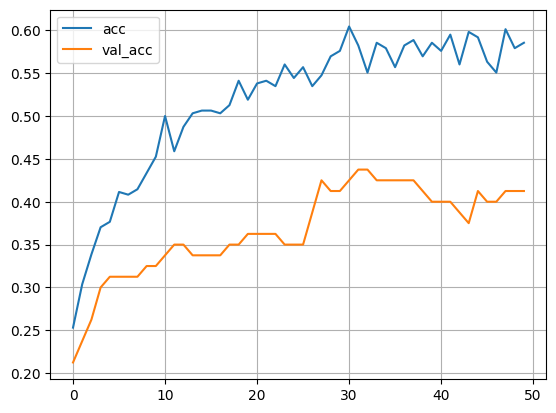

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4289 - loss: 0.8912 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9780831820819548
r2_score in Simulation Failt  void  for Each Blade :  0.9621371893868506
Error in Simulation Fault for Each Blade :  0.9374197805109796  --- r2_score Fault S ----  0.9491628548924168
Error in Simulation Fault T  for Each Blade :  0.9374197805109796  --- r2_score Fault T :  0.1001507946875656
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9866682821547247
r2_score in Simulation Failt  void  for Each Blade :  0.9935680181438525
Error in Simulation Fault for Each Blade :  -1.6524946859561471  --- r2_score Fault S ----  0.9741916481755256
Error in Simulation Fault T  for Each Blade :  -1.6524946859561471  --- r2_score Fault T :  -0.4995927924612118
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.2238 - loss: 1.4255 - val_acc: 0.1000 - val_loss: 1.5202
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2361 - loss: 1.4082 - val_acc: 0.1250 - val_loss: 1.4827
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2970 - loss: 1.3748 - val_acc: 0.1875 - val_loss: 1.4520
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3583 - loss: 1.3408 - val_acc: 0.2000 - val_loss: 1.4241
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3815 - loss: 1.2809 - val_acc: 0.2250 - val_loss: 1.3954
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4248 - loss: 1.2828 - val_acc: 0.2250 - val_loss: 1.3654
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4610 - loss: 1.2347 - val_acc: 0.2500 - val_loss: 1.3411
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4794 - loss: 1.2119 - val_acc: 0.3000 - val_loss: 1.3197
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4597 - loss: 1.2619 - 

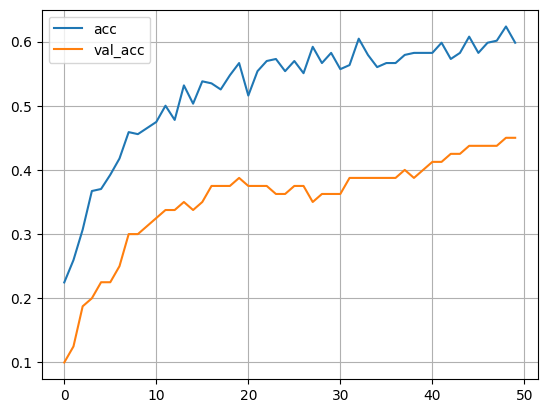

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4750 - loss: 0.9047 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9919764008197895
r2_score in Simulation Failt  void  for Each Blade :  0.9584465677139902
Error in Simulation Fault for Each Blade :  1.1664357126738123  --- r2_score Fault S ----  0.9715706292658128
Error in Simulation Fault T  for Each Blade :  1.1664357126738123  --- r2_score Fault T :  -2.4714904908633364
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9896567205278295
r2_score in Simulation Failt  void  for Each Blade :  0.9722470132587535
Error in Simulation Fault for Each Blade :  -0.8572278248229019  --- r2_score Fault S ----  0.9856381558654584
Error in Simulation Fault T  for Each Blade :  -0.8572278248229019  --- r2_score Fault T :  -1.326415262860254
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.525
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.2416 - loss: 1.3907 - val_acc: 0.2875 - val_loss: 1.3866
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3054 - loss: 1.3492 - val_acc: 0.3375 - val_loss: 1.3715
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3339 - loss: 1.3347 - val_acc: 0.3250 - val_loss: 1.3558
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3660 - loss: 1.2881 - val_acc: 0.3375 - val_loss: 1.3395
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3691 - loss: 1.2967 - val_acc: 0.3875 - val_loss: 1.3227
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3904 - loss: 1.2598 - val_acc: 0.4000 - val_loss: 1.3060
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3707 - loss: 1.2488 - val_acc: 0.4250 - val_loss: 1.2892
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4325 - loss: 1.1997 - val_acc: 0.4000 - val_loss: 1.2701
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4471 - loss: 1.19

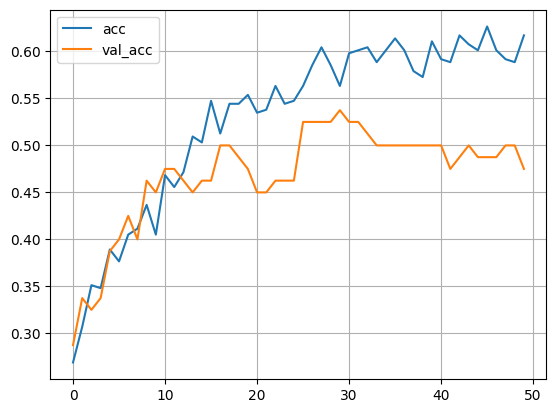

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5109 - loss: 0.8966 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9699511201239479
r2_score in Simulation Failt  void  for Each Blade :  0.9815854086319052
Error in Simulation Fault for Each Blade :  0.8754934763707749  --- r2_score Fault S ----  0.9733265593278568
Error in Simulation Fault T  for Each Blade :  0.8754934763707749  --- r2_score Fault T :  -1.2114814791480106
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.981353196647458
r2_score in Simulation Failt  void  for Each Blade :  0.9840381653146864
Error in Simulation Fault for Each Blade :  0.07264992060642195  --- r2_score Fault S ----  0.9806327824359662
Error in Simulation Fault T  for Each Blade :  0.07264992060642195  --- r2_score Fault T :  -1.1068758057554042
 ----- for each Blade Simulated ----- 
r2_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.4125
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.2379 - loss: 1.4443 - val_acc: 0.2250 - val_loss: 1.3946
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2581 - loss: 1.4218 - val_acc: 0.2750 - val_loss: 1.3770
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2790 - loss: 1.3916 - val_acc: 0.3000 - val_loss: 1.3606
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3189 - loss: 1.3541 - val_acc: 0.3250 - val_loss: 1.3462
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3824 - loss: 1.3006 - val_acc: 0.3750 - val_loss: 1.3290
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4064 - loss: 1.3134 - val_acc: 0.3625 - val_loss: 1.3113
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4587 - loss: 1.2803 - val_acc: 0.4000 - val_loss: 1.2916
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4121 - loss: 1.2689 - val_acc: 0.3875 - val_loss: 1.2758
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.4113 - loss: 1.2480 - 

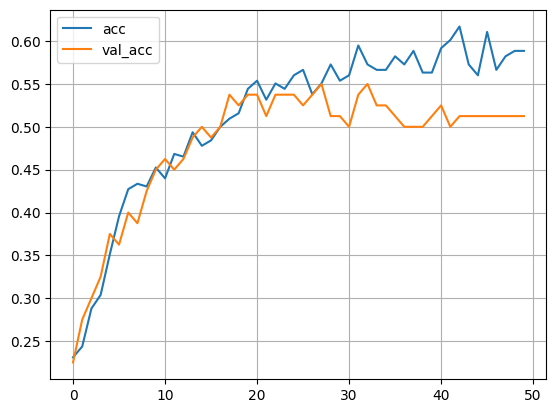

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5375 - loss: 0.8730 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.008 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9820971831444628
r2_score in Simulation Failt  void  for Each Blade :  0.9841224386491154
Error in Simulation Fault for Each Blade :  1.7032985862563708  --- r2_score Fault S ----  0.9662182595840787
Error in Simulation Fault T  for Each Blade :  1.7032985862563708  --- r2_score Fault T :  -1.250992040274605
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9826850703344077
r2_score in Simulation Failt  void  for Each Blade :  0.9958055322808669
Error in Simulation Fault for Each Blade :  -1.9281828727226005  --- r2_score Fault S ----  0.9784166020489065
Error in Simulation Fault T  for Each Blade :  -1.9281828727226005  --- r2_score Fault T :  -0.43384797663871555
 ----- for each Blade Simulated ----- 
r2

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
28 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.425
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.2314 - loss: 1.4953 - val_acc: 0.3375 - val_loss: 1.3871
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.2407 - loss: 1.4422 - val_acc: 0.3250 - val_loss: 1.3745
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2300 - loss: 1.4337 - val_acc: 0.3125 - val_loss: 1.3660
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2883 - loss: 1.3659 - val_acc: 0.2875 - val_loss: 1.3586
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2686 - loss: 1.3752 - val_acc: 0.2750 - val_loss: 1.3457
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.3269 - loss: 1.3608 - val_acc: 0.3125 - val_loss: 1.3355
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4525 - loss: 1.2844 - val_acc: 0.3000 - val_loss: 1.3245
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4597 - loss: 1.2885 - val_acc: 0.3625 - val_loss: 1.3089
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4260 - loss: 1.2809 -

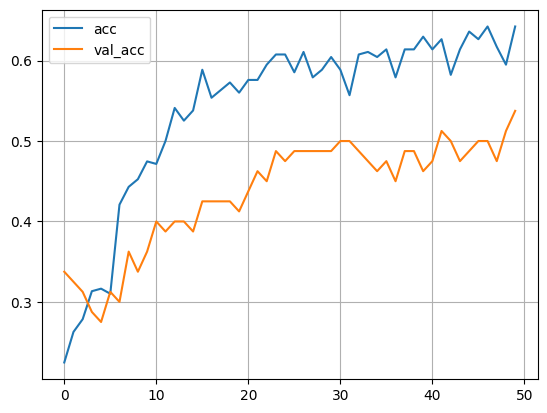

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5617 - loss: 0.8687 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 1 
r2_score in Simulation Health for Each Blade :  0.9833970284201734
r2_score in Simulation Failt  void  for Each Blade :  0.9554996097448516
Error in Simulation Fault for Each Blade :  -0.9437453094259625  --- r2_score Fault S ----  0.9859071240417419
Error in Simulation Fault T  for Each Blade :  -0.9437453094259625  --- r2_score Fault T :  -2.6145552360839908
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.985701024037144
r2_score in Simulation Failt  void  for Each Blade :  0.9865217788322406
Error in Simulation Fault for Each Blade :  1.034488528683595  --- r2_score Fault S ----  0.9689910656893286
Error in Simulation Fault T  for Each Blade :  1.034488528683595  --- r2_score Fault T :  -1.0427711048167416
 ----- for each Blade Simulated ----- 
r2_sc

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.45
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] EN

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.2052 - loss: 1.5010 - val_acc: 0.2250 - val_loss: 1.4564
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2118 - loss: 1.4561 - val_acc: 0.2125 - val_loss: 1.4375
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2505 - loss: 1.4496 - val_acc: 0.2000 - val_loss: 1.4208
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2001 - loss: 1.4169 - val_acc: 0.2125 - val_loss: 1.4054
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2803 - loss: 1.3798 - val_acc: 0.2125 - val_loss: 1.3909
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2786 - loss: 1.3834 - val_acc: 0.2375 - val_loss: 1.3760
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3167 - loss: 1.3377 - val_acc: 0.2750 - val_loss: 1.3625
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3269 - loss: 1.3398 - val_acc: 0.3625 - val_loss: 1.3474
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4188 - loss: 1.2985 - v

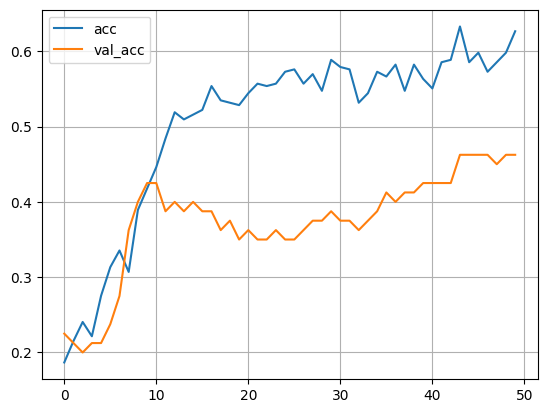

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.4891 - loss: 0.8531 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 2 
r2_score in Simulation Health for Each Blade :  0.9838157053779649
r2_score in Simulation Failt  void  for Each Blade :  0.9867884365871873
Error in Simulation Fault for Each Blade :  0.08712953860767358  --- r2_score Fault S ----  0.9825255683364331
Error in Simulation Fault T  for Each Blade :  0.08712953860767358  --- r2_score Fault T :  -0.7779030597033871
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9910721302666732
r2_score in Simulation Failt  void  for Each Blade :  0.9793626050674673
Error in Simulation Fault for Each Blade :  -0.6378439503766697  --- r2_score Fault S ----  0.9861481463215412
Error in Simulation Fault T  for Each Blade :  -0.6378439503766697  --- r2_score Fault T :  -0.751274484287562
 ----- for each Blade Simulated ----- 
r

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.5375
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.2764 - loss: 1.4819 - val_acc: 0.2625 - val_loss: 1.4195
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.2875 - loss: 1.4228 - val_acc: 0.3000 - val_loss: 1.3902
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.2973 - loss: 1.4167 - val_acc: 0.3250 - val_loss: 1.3655
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3231 - loss: 1.3429 - val_acc: 0.3250 - val_loss: 1.3445
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3581 - loss: 1.3447 - val_acc: 0.3625 - val_loss: 1.3258
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3504 - loss: 1.3440 - val_acc: 0.3750 - val_loss: 1.3065
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4316 - loss: 1.2949 - val_acc: 0.3750 - val_loss: 1.2868
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4197 - loss: 1.2730 - val_acc: 0.3875 - val_loss: 1.2689
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4135 - loss: 1.2349 - v

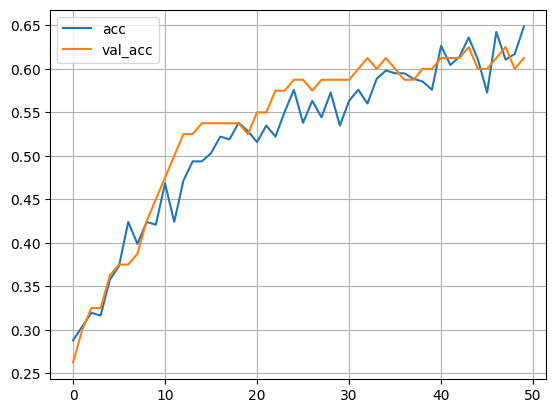

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.5992 - loss: 0.8330 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 3 
r2_score in Simulation Health for Each Blade :  0.9840576324988619
r2_score in Simulation Failt  void  for Each Blade :  0.983976931836802
Error in Simulation Fault for Each Blade :  0.814893076633588  --- r2_score Fault S ----  0.9748621292137626
Error in Simulation Fault T  for Each Blade :  0.814893076633588  --- r2_score Fault T :  -1.2672671589831763
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9760481314862763
r2_score in Simulation Failt  void  for Each Blade :  0.9703624080252949
Error in Simulation Fault for Each Blade :  0.7928287978810065  --- r2_score Fault S ----  0.98072591370597
Error in Simulation Fault T  for Each Blade :  0.7928287978810065  --- r2_score Fault T :  0.026083088039192015
 ----- for each Blade Simulated ----- 
r2_score

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.3672 - loss: 1.3546 - val_acc: 0.2750 - val_loss: 1.3918
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.2898 - loss: 1.3557 - val_acc: 0.2500 - val_loss: 1.3712
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.3555 - loss: 1.3284 - val_acc: 0.2625 - val_loss: 1.3569
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3875 - loss: 1.3027 - val_acc: 0.2625 - val_loss: 1.3456
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.3955 - loss: 1.3200 - val_acc: 0.2625 - val_loss: 1.3298
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.3705 - loss: 1.2877 - val_acc: 0.2750 - val_loss: 1.3121
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4003 - loss: 1.2652 - val_acc: 0.3125 - val_loss: 1.2960
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4478 - loss: 1.2502 - val_acc: 0.3625 - val_loss: 1.2774
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.4579 - loss: 1.2332 - 

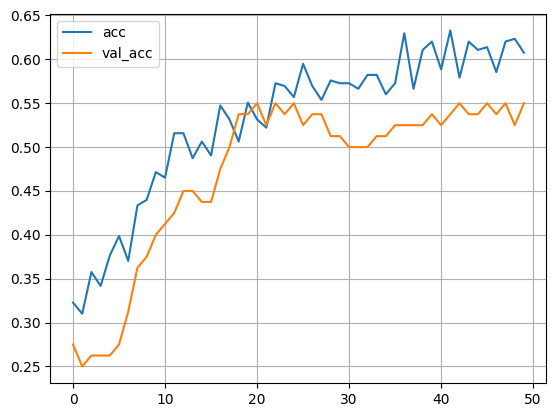

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - acc: 0.5836 - loss: 0.8683 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 
iter_alpha : 0.009 | iter_flat : 4 
r2_score in Simulation Health for Each Blade :  0.9725175836258506
r2_score in Simulation Failt  void  for Each Blade :  0.9650609926280204
Error in Simulation Fault for Each Blade :  0.8793189898888643  --- r2_score Fault S ----  0.9737833182469939
Error in Simulation Fault T  for Each Blade :  0.8793189898888643  --- r2_score Fault T :  -1.5194987259099264
 ----- for each Blade Simulated ----- 
r2_score in Simulation Health for Each Blade :  0.9520117460926278
r2_score in Simulation Failt  void  for Each Blade :  0.9776064507566236
Error in Simulation Fault for Each Blade :  1.042872513506758  --- r2_score Fault S ----  0.9747484351242295
Error in Simulation Fault T  for Each Blade :  1.042872513506758  --- r2_score Fault T :  -1.2195773832290824
 ----- for each Blade Simulated ----- 
r2_sco

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

accuracy accuracy_random_forest  : 0.475
Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] E

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - acc: 0.3303 - loss: 1.5181 - val_acc: 0.3875 - val_loss: 1.4428
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.3531 - loss: 1.4158 - val_acc: 0.3375 - val_loss: 1.4113
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.3344 - loss: 1.3911 - val_acc: 0.3125 - val_loss: 1.3901
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4126 - loss: 1.3426 - val_acc: 0.3250 - val_loss: 1.3758
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - acc: 0.4022 - loss: 1.3354 - val_acc: 0.3375 - val_loss: 1.3630
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3955 - loss: 1.3091 - val_acc: 0.3500 - val_loss: 1.3509
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - acc: 0.3702 - loss: 1.2956 - val_acc: 0.3750 - val_loss: 1.3381
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.3962 - loss: 1.2735 - val_acc: 0.3625 - val_loss: 1.3265
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.4726 - loss: 1.23

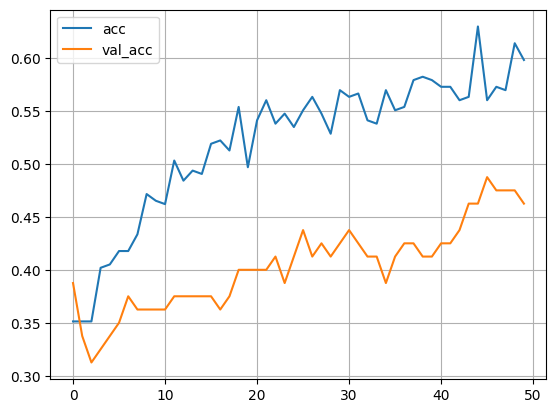

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.4773 - loss: 0.9274 
 ----------------- //////// End This Iter alpha and Flap //////// ------------------------- 


In [8]:
for iter_alpha in total_alpha_content :
  for iter_flat in total_flat_content :
    print(f"iter_alpha : {iter_alpha} | iter_flat : {iter_flat} ")
    params_health   = []
    params_fault    = []
    params_fault_t  = []
    params_health_t = []
    for iter_link in total_file_link :
      df_table_change     = pd.read_csv(iter_link)
      for locate in total_location:
        related_x = -1
        related_y = -1
        related_z = -1
        for iteration in range(3):
          alpha = 0
          term  = 0
          Flat_Add = 0
          noise_activate = ( (np.random.randn() + 1 ) / 100 )
          #print( f'Alpha : {iter_alpha} ' ,  f'Table Change : {iter_link}' , ' -- ' , f'Locate : {locate} ' , ' -- ' , f"Iter : {iteration}" , ' -- ' , '')
          select_location_combin_flap_term = 0
          select_locatiom_flap = 0

          total_health_iter  = []
          total_health_iter_t = []
          total_fault_iter   = []
          total_fault_t_iter = []
          new_data_simulated_ = []
          new_data_simulated_fault = []
          new_data_simulated_fault_t = []
          new_data_simulated_health_t = []



          for i in range(df_table_change.shape[0]):
            x_mean = df_table_change.iloc[i, 1]
            x_std  = df_table_change.iloc[i, 2]
            y_mean = df_table_change.iloc[i, 3]
            y_std  = df_table_change.iloc[i, 4]
            z_mean = df_table_change.iloc[i, 5]
            z_std  = df_table_change.iloc[i, 6]

            if i > locate :
              alpha = iter_alpha
              term  = -1 * ( alpha * abs( i - locate ) + noise_activate )
              Flat_Add  = iter_flat / 10

            for element in total_points[i * 3: (i + 1) * 3, :]:
              x_sample = element[0]
              y_sample = element[1]
              z_sample = element[2]
              rng = np.random.default_rng()
              x_added  = rng.normal(x_mean, x_std, size=1)
              x_added  = x_added.tolist()[0]
              x_sample += related_x * x_added

              y_added  = rng.normal(y_mean, y_std, size=1)
              y_added  = y_added.tolist()[0]
              y_sample += related_y * y_added

              z_added  = rng.normal(z_mean, z_std, size=1)
              z_base   = z_sample

              z_added_term  = z_added.tolist()[0] + term
              z_added       = z_added.tolist()[0]
              z_sample_new_term = z_base + related_z * z_added_term
              z_sample_new      = z_base + related_z * z_added
              z_flat  = z_sample_new_term
              z_flap_health = z_sample_new


              if select_location_combin_flap_term  == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flat = z_sample_new_term + Flat_Add


              if select_locatiom_flap == 0 :
                if np.random.randint(0 ,2 ) :
                  z_flap_health = z_sample_new + Flat_Add







              new_data_simulated_.append([ x_sample, y_sample, z_sample_new  ])
              new_data_simulated_fault.append([ x_sample, y_sample, z_sample_new_term  ])
              new_data_simulated_fault_t.append([ x_sample, y_sample, z_flat  ])
              new_data_simulated_health_t.append([x_sample , y_sample , z_flap_health ])

              total_health_iter.append([ x_sample, y_sample, z_sample_new  ])
              total_fault_iter.append([ x_sample, y_sample, z_sample_new_term  ])
              total_fault_t_iter.append([ x_sample, y_sample, z_flat  ])
              total_health_iter_t.append([x_sample , y_sample , z_flap_health ])



          # fig = plt.figure(figsize=(20 , 10 ))

          # ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )
          # ax1 = fig.add_subplot(1 , 6 , 2 , projection='3d' )
          # ax2 = fig.add_subplot(1 , 6 , 3 , projection='3d' )
          # ax3 = fig.add_subplot(1 , 6 , 4 , projection='3d' )
          # ax4 = fig.add_subplot(1 , 6 , 5 , projection='3d' )
          # ax5 = fig.add_subplot(1 , 6 , 6 , projection='3d' )

          # ax6 = fig.add_subplot(3 , 6 , 1 )
          # ax7 = fig.add_subplot(3 , 6 , 2 )
          # ax8 = fig.add_subplot(3 , 6 , 3 )

          # # ax3 = fig.add_subplot(1 , 6 , 4 )
          # # ax4 = fig.add_subplot(1 , 6 , 5 )
          # # ax5 = fig.add_subplot(1 , 6 , 6 )






          # total_health_iter = np.array(total_health_iter)
          # total_health_iter = np.array(total_health_iter)
          # total_fault_iter = np.array(total_fault_iter)
          # total_fault_t_iter = np.array(total_fault_t_iter)
          # total_health_iter_t = np.array(total_health_iter_t)
          # print(f"iter_alpha : {iter_alpha} , flap: {iter_flat} , locate : {locate} ,  iteration : {iteration} ")

          # ax0.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ] , total_health_iter[: , 2 ]  , label='health' , c = 'r'   )
          # ax0.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  , label='fault_alpha' ,  c = 'b' )
          # ax1.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='blue', s = 30 , alpha = 0.5    )
          # ax1.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red' , s = 30 )
          # ax2.scatter3D(total_fault_t_iter[: , 0 ] , total_fault_t_iter[: , 1 ] , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='red'  , s = 30  )

          # ax3.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='fault_void' , c ='blue'  )
          # ax3.scatter3D(total_fault_iter[: , 0 ] , total_fault_iter[: , 1]  , total_fault_iter[: , 2 ]  ,       label='fault_alpha' , c ='red' )
          # ax3.set_xlabel("axis x ")
          # ax3.set_ylabel("axis y ")

          # ax4.scatter3D(total_health_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_health_iter[: , 2 ]  ,       label='health' , c ='blue',  )
          # ax4.scatter3D(total_fault_t_iter[: , 0 ] , total_health_iter[: , 1 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha+ void ' , c='red' ,  )
          # ax4.set_xlabel("axis x")
          # ax4.set_ylabel("axis y")

          # ax5.scatter3D(total_health_iter[: , 0 ]  , total_health_iter[: , 1 ] , total_fault_iter[: , 2 ]  ,       label='health' , c ='blue' ,  )
          # ax5.scatter3D(total_health_iter_t[: , 0 ] , total_health_iter_t[: , 1] , total_fault_t_iter[: , 2 ]  , label='fault_void' , c='red' ,  )
          # ax5.set_xlabel("axis x ")
          # ax5.set_ylabel("axis y ")

          # ax6.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.7 )
          # ax6.scatter(total_health_iter_t[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_void' , c='r' , s = 30 , alpha = 0.6  )
          # ax6.set_xlabel("axis  x ")
          # ax6.set_ylabel("axis  y ")
          # ax6.set_title(f"alpha : {iter_alpha} , void : {iter_flat/10} ")

          # ax7.scatter(total_health_iter[: , 0 ]  , total_health_iter[: , 2 ]  , label='health' , c='b' , s = 40 , alpha = 0.2 )
          # ax7.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='fault_alpha + void ' , c='r' , s = 30 , alpha = 0.5  )
          # ax7.set_xlabel("axis  x ")
          # ax7.set_ylabel("axis  y ")

          # ax8.scatter(total_fault_iter[: , 0 ]  , total_fault_iter[: , 2 ]  , label='fault_alpha' , c='b' , )
          # ax8.scatter(total_fault_t_iter[: , 0 ]  , total_fault_t_iter[: , 2 ]  , label='F_alpha + void' , c='r')
          # ax8.set_xlabel("axis  x ")
          # ax8.set_ylabel("axis  y ")


          # ax0.legend()
          # ax0.grid()
          # ax0
          # ax1.legend()
          # ax1.grid()
          # ax2.legend()
          # ax2.grid()
          # ax3.legend()
          # ax3.grid()

          # ax4.legend()
          # ax4.grid()
          # ax5.legend()
          # ax5.grid()


          # ax6.legend()
          # ax6.grid()

          # ax7.legend()
          # ax7.grid()
          # ax8.legend()
          # ax8.grid()

          # plt.show()




          new_data_simulated_         = np.array(new_data_simulated_)
          new_data_simulated_fault    = np.array(new_data_simulated_fault)
          new_data_simulated_fault_t  = np.array(new_data_simulated_fault_t)
          new_data_simulated_health_t = np.array(new_data_simulated_health_t)


          #fig = plt.figure(figsize=(30, 10))
          df_health = pd.DataFrame()
          df_health['X_'] = new_data_simulated_[:, 0]
          df_health['Y_'] = new_data_simulated_[:, 1]
          df_health['Z_'] = new_data_simulated_[:, 2]

          poly = PolynomialFeatures(degree=2)
          x_poly = poly.fit_transform(df_health[['X_', 'Y_']])
          scaler = StandardScaler()
          df_stander = pd.DataFrame(scaler.fit_transform(x_poly), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander['Z_'] = df_health['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model = LinearRegression()
          model.fit(x_train, z_train)
          z_predict = model.predict(x_test)
          intercept_0 = model.intercept_
          coef1 = model.coef_[0]
          coef2 = model.coef_[1]
          coef3 = model.coef_[2]
          coef4 = model.coef_[3]
          coef5 = model.coef_[4]
          coef6 = model.coef_[5]

          total_new_generate = []
          total_error_health = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander.iloc[i, 0] + coef2 * df_stander.iloc[i, 1] + coef3 * df_stander.iloc[i, 2] + coef4 * df_stander.iloc[i, 3] + coef5 * df_stander.iloc[i, 4]
            + coef6 * df_stander.iloc[i, 5]
            total_new_generate.append(new_value)
            error = df_stander.iloc[i, -1] - new_value
            total_error_health += error

          print("r2_score in Simulation Health for Each Blade : " , r2_score(z_predict, z_test) )

          #class health == 0
          params_health.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict, z_test),locate , 0 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class health t ----

          df_health_t = pd.DataFrame()
          df_health_t['X_'] = new_data_simulated_health_t[:, 0]
          df_health_t['Y_'] = new_data_simulated_health_t[:, 1]
          df_health_t['Z_'] = new_data_simulated_health_t[:, 2]

          poly_health_t = PolynomialFeatures(degree=2)
          x_poly_health_t = poly_health_t.fit_transform(df_health_t[['X_', 'Y_']])
          scaler_health_t = StandardScaler()
          df_stander_health_t = pd.DataFrame(scaler_health_t.fit_transform(x_poly_health_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_health_t['Z_'] = df_health_t['Z_']
          x_train, x_test, z_train, z_test = train_test_split(df_stander_health_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']],
                                                                          df_stander["Z_"])
          model_health_t = LinearRegression()
          model_health_t.fit(x_train, z_train)
          z_predict_health_t = model_health_t.predict(x_test)
          intercept_0 = model_health_t.intercept_
          coef1 = model_health_t.coef_[0]
          coef2 = model_health_t.coef_[1]
          coef3 = model_health_t.coef_[2]
          coef4 = model_health_t.coef_[3]
          coef5 = model_health_t.coef_[4]
          coef6 = model_health_t.coef_[5]

          total_new_generate_health_t = []
          total_error_health_t = 0
          for i in range(len(df_health['X_'])):
            new_value = intercept_0 + coef1 * df_stander_health_t.iloc[i, 0] + coef2 * df_stander_health_t.iloc[i, 1] + coef3 * df_stander_health_t.iloc[i, 2] + coef4 * df_stander_health_t.iloc[i, 3] + coef5 * df_stander_health_t.iloc[i, 4]
            + coef6 * df_stander_health_t.iloc[i, 5]
            total_new_generate_health_t.append(new_value)
            error = df_stander_health_t.iloc[i, -1] - new_value
            total_error_health_t += error

          print("r2_score in Simulation Failt  void  for Each Blade : " , r2_score(z_predict_health_t, z_test) )

          #class health == 0
          params_health_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_health_t, z_test),locate , 1 , iter_alpha ,  iter_flat  ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]





          # ---- setup for class Fault ----
          df_fault = pd.DataFrame()
          df_fault['X_'] = new_data_simulated_fault[:, 0]
          df_fault['Y_'] = new_data_simulated_fault[:, 1]
          df_fault['Z_'] = new_data_simulated_fault[:, 2]




          poly_fault = PolynomialFeatures(degree=2)
          x_poly_fault = poly_fault.fit_transform(df_fault[['X_', 'Y_']])
          scaler_fault = StandardScaler()
          df_stander_fault = pd.DataFrame(scaler_fault.fit_transform(x_poly_fault), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault['Z_'] = df_fault['Z_']
          x_train_fault , x_test_fault , z_train_fault , z_test_fault = train_test_split(df_stander_fault[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault = LinearRegression()
          model_fault.fit(x_train_fault, z_train_fault)
          z_predict_fault = model_fault.predict(x_test_fault)
          intercept_0 = model_fault.intercept_
          coef1 = model_fault.coef_[0]
          coef2 = model_fault.coef_[1]
          coef3 = model_fault.coef_[2]
          coef4 = model_fault.coef_[3]
          coef5 = model_fault.coef_[4]
          coef6 = model_fault.coef_[5]
          total_new_generate_fault = []
          total_error_fault = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault.iloc[i, 0] + coef2 * df_stander_fault.iloc[i, 1] + coef3 *  df_stander_fault.iloc[i, 2] + coef4 * df_stander_fault.iloc[i, 3] + coef5 * df_stander_fault.iloc[i, 4]  + coef6 * df_stander_fault.iloc[i, 5]
            total_new_generate_fault.append(new_value)
            error_Fault = df_stander_fault.iloc[i, -1] - new_value
            total_error_fault += error_Fault

          print("Error in Simulation Fault for Each Blade : " , total_error_fault  , " --- r2_score Fault S ---- " ,  r2_score(z_predict_fault, z_test_fault))


          params_fault.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault, z_test_fault),locate ,  2 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          # ---- setup for class Fault T ----

          df_fault_t = pd.DataFrame()
          df_fault_t['X_'] = new_data_simulated_fault_t[:, 0]
          df_fault_t['Y_'] = new_data_simulated_fault_t[:, 1]
          df_fault_t['Z_'] = new_data_simulated_fault_t[:, 2]




          poly_fault_t = PolynomialFeatures(degree=2)
          x_poly_fault_t = poly_fault_t.fit_transform(df_fault_t[['X_', 'Y_']])
          scaler_fault_t = StandardScaler()
          df_stander_fault_t = pd.DataFrame(scaler_fault_t.fit_transform(x_poly_fault_t), columns=['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2', ])
          df_stander_fault_t['Z_'] = df_fault_t['Z_']
          x_train_fault_t , x_test_fault_t , z_train_fault_t , z_test_fault_t = train_test_split(df_stander_fault_t[['0', 'X', 'Y', 'x1^2', 'x1x2', 'x2^2']], df_stander_fault["Z_"])
          model_fault_t = LinearRegression()
          model_fault_t.fit(x_train_fault_t, z_train_fault_t)
          z_predict_fault_t = model_fault_t.predict(x_test_fault_t)
          intercept_0 = model_fault_t.intercept_
          coef1 = model_fault_t.coef_[0]
          coef2 = model_fault_t.coef_[1]
          coef3 = model_fault_t.coef_[2]
          coef4 = model_fault_t.coef_[3]
          coef5 = model_fault_t.coef_[4]
          coef6 = model_fault_t.coef_[5]
          total_new_generate_fault_t = []
          total_error_fault_t = 0
          for i in range(len(df_fault['X_'])):
            new_value = intercept_0 + coef1 * df_stander_fault_t.iloc[i, 0] + coef2 * df_stander_fault_t.iloc[i, 1] + coef3 *  df_stander_fault_t.iloc[i, 2] + coef4 * df_stander_fault_t.iloc[i, 3] + coef5 * df_stander_fault_t.iloc[i, 4]  + coef6 * df_stander_fault_t.iloc[i, 5]
            total_new_generate_fault_t.append(new_value)
            error_Fault = df_stander_fault_t.iloc[i, -1] - new_value
            total_error_fault_t += error_Fault

          print("Error in Simulation Fault T  for Each Blade : " , total_error_fault , " --- r2_score Fault T : " ,  r2_score(z_predict_fault_t, z_test_fault)   )



          params_fault_t.append([intercept_0, coef1, coef2, coef3, coef4, coef5, coef6, r2_score(z_predict_fault_t, z_test_fault),locate ,  3 , iter_alpha ,  iter_flat ])
          total_change = [1, 1]
          related_x *= total_change[np.random.randint(0, 2)]
          related_y *= total_change[np.random.randint(0, 2)]
          related_z *= total_change[np.random.randint(0, 2)]

          print(" ----- for each Blade Simulated ----- " )



#----
    params_health = np.array(params_health)
    df_params = pd.DataFrame({'bias':params_health[: , 0 ] , 'betha_0':params_health[ : , 1 ] , 'betha_1':params_health[ : , 2 ] , 'betha_2':params_health[ : , 3 ] ,  'betha_3':params_health[ : , 4 ] , 'betha_4':params_health[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health[ : , 7 ]  ,
                          'locate' : params_health[: , 8 ].astype(int)   , 'class' :params_health[: , 9 ] ,
                              'alpha' :params_health[: , 10 ] , 'flap' : params_health[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_bias'].append(df_params['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_bias'].append(df_params['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_0'].append(df_params['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_0'].append(df_params['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_1'].append(df_params['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_1'].append(df_params['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_2'].append(df_params['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_2'].append(df_params['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_3'].append(df_params['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_3'].append(df_params['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_4'].append(df_params['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_4'].append(df_params['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['mean_betha_5'].append(df_params['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH['std_betha_5'].append(df_params['betha_5'].std())

    # -------------------------------------------------------------------------------------------

    params_health_t = np.array(params_health_t)
    df_params_health_t = pd.DataFrame({'bias':params_health_t[: , 0 ] , 'betha_0':params_health_t[ : , 1 ] , 'betha_1':params_health_t[ : , 2 ] , 'betha_2':params_health_t[ : , 3 ] ,  'betha_3':params_health_t[ : , 4 ] , 'betha_4':params_health_t[ : , 5 ] , 'betha_5':params_health[ : , 6 ] , 'R2' : params_health_t[ : , 7 ]  ,
                          'locate' : params_health_t[: , 8 ].astype(int)   , 'class' :params_health_t[: , 9 ] ,
                              'alpha' :params_health_t[: , 10 ] , 'flap' : params_health_t[: , 11 ] } )





    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_bias'].append(df_params_health_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_bias'].append(df_params_health_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_0'].append(df_params_health_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_0'].append(df_params_health_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_1'].append(df_params_health_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_1'].append(df_params_health_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_2'].append(df_params_health_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_2'].append(df_params_health_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_3'].append(df_params_health_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_3'].append(df_params_health_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_4'].append(df_params_health_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_4'].append(df_params_health_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['mean_betha_5'].append(df_params_health_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T['std_betha_5'].append(df_params_health_t['betha_5'].std())





    # --------------------------------------------------------------------------------------------
    params_fault = np.array(params_fault)
    df_params_fault = pd.DataFrame({'bias':params_fault[: , 0 ] , 'betha_0':params_fault[ : , 1 ] , 'betha_1':params_fault[ : , 2 ] , 'betha_2':params_fault[ : , 3 ] ,  'betha_3':params_fault[ : , 4 ] , 'betha_4':params_fault[ : , 5 ] , 'betha_5':params_fault[ : , 6 ] , 'R2' : params_fault[ : , 7 ]  ,
                            'locate' : params_fault[: , 8 ].astype(int) ,
                                    'class' :params_fault[: , 9 ]  ,
                                    'alpha' :params_fault[: , 10 ] , 'flap' : params_fault[: , 11 ] }   )


    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_bias'].append(df_params_fault['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_bias'].append(df_params_fault['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_0'].append(df_params_fault['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_0'].append(df_params_fault['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_1'].append(df_params_fault['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_1'].append(df_params_fault['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_2'].append(df_params_fault['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_2'].append(df_params_fault['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_3'].append(df_params_fault['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_3'].append(df_params_fault['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_4'].append(df_params_fault['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_4'].append(df_params_fault['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['mean_betha_5'].append(df_params_fault['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT['std_betha_5'].append(df_params_fault['betha_5'].std())




    params_fault_t = np.array(params_fault_t)
    df_params_fault_t = pd.DataFrame({'bias':params_fault_t[: , 0 ] , 'betha_0':params_fault_t[ : , 1 ] , 'betha_1':params_fault_t[ : , 2 ] , 'betha_2':params_fault_t[ : , 3 ] ,  'betha_3':params_fault_t[ : , 4 ] , 'betha_4':params_fault_t[ : , 5 ] , 'betha_5':params_fault_t[ : , 6 ] , 'R2' : params_fault_t[ : , 7 ]  ,
                            'locate' : params_fault_t[: , 8 ].astype(int) ,
                                    'class' :params_fault_t[: , 9 ]  ,
                                    'alpha' :params_fault_t[: , 10 ] , 'flap' : params_fault_t[: , 11 ] }  )


    # check_columns = ['bias' , 'betha_0' , 'betha_1' , 'betha_2' , 'betha_3' , 'betha_4' , 'betha_5' ]
    # for element in check_columns :
    #   fig = plt.figure(figsize = (10 , 10 ))
    #   ax0 = fig.add_subplot(111 )
    #   sns.kdeplot( df_params[element]  , label=f'mean_health - {element} coef'  , shade=True )
    #   sns.kdeplot(df_params_fault[element] , label=f'mean_fault_alpha - {element} coef '  , shade=True  )
    #   sns.kdeplot(df_params_fault_t[element] , label=f'mean_fault-alpha + void- {element} coef ' ,  shade=True  )
    #   sns.kdeplot(df_params_health_t[element] , label=f'mean_fault-void- {element} coef ' ,  shade=True  )
    #   plt.legend()
    #   plt.grid()
    #   plt.show()



    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_bias'].append(df_params_fault_t['bias'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_bias'].append(df_params_fault_t['bias'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_0'].append(df_params_fault_t['betha_0'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_0'].append(df_params_fault_t['betha_0'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_1'].append(df_params_fault_t['betha_1'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_1'].append(df_params_fault_t['betha_1'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_2'].append(df_params_fault_t['betha_2'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_2'].append(df_params_fault_t['betha_2'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_3'].append(df_params_fault_t['betha_3'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_3'].append(df_params_fault_t['betha_3'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_4'].append(df_params_fault_t['betha_4'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_4'].append(df_params_fault_t['betha_4'].std())

    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['mean_betha_5'].append(df_params_fault_t['betha_5'].mean())
    MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T['std_betha_5'].append(df_params_fault_t['betha_5'].std())



    concat_2_df_health_fault = pd.concat([df_params , df_params_health_t , df_params_fault , df_params_fault_t ] , axis = 0 )
    df_corr = concat_2_df_health_fault.corr()







  # --- learning
    #plt.figure(figsize= (10 , 10 ) )
    #ax = sns.heatmap(df_corr , annot=True )
    #print(df_corr)
    #plt.show()
    total_simulation['alpha'].append(iter_alpha)
    total_simulation['flap'].append(iter_flat)
    total_simulation['bias_correlation'].append(df_corr['class']['bias'])
    total_simulation['betha_0_correlation'].append(df_corr['class']['betha_0'])
    total_simulation['betha_1_correlation'].append(df_corr['class']['betha_1'])
    total_simulation['betha_2_correlation'].append(df_corr['class']['betha_2'])
    total_simulation['betha_3_correlation'].append(df_corr['class']['betha_3'])
    total_simulation['betha_4_correlation'].append(df_corr['class']['betha_4'])
    total_simulation['betha_5_correlation'].append(df_corr['class']['betha_5'])



    #df2_health  =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 0 ]
    #df2_fault   =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 1 ]
    #df2_fault_t =  concat_2_df_health_fault[concat_2_df_health_fault['class'] == 2 ]


    stander_u = StandardScaler()
    stand_df_with_out = concat_2_df_health_fault.drop(['class' , 'alpha' , 'flap'] , axis = 1 )
    stand_df_with_out = pd.DataFrame(stander_u.fit_transform(stand_df_with_out )  , columns = stand_df_with_out.columns )
    x_u_train , x_u_test , y_u_train , y_u_test = train_test_split(stand_df_with_out , concat_2_df_health_fault['class'] , random_state=42 , test_size=0.2  )
    obj_gaunb = GaussianNB()
    obj_gaunb.fit(x_u_train , y_u_train )
    pre_nb = obj_gaunb.predict(x_u_test)
    accuray_nav = accuracy_score(pre_nb ,y_u_test )
    print(f"accuracy Nave Bays : {accuray_nav}")
    total_simulation['accuracy_nav'].append(accuray_nav)


    # ---------------------------------------------------------
    rfc=RandomForestClassifier(random_state=42)
    param_grid = {
        'n_estimators': [200, 500],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6,7,8],
        'criterion' :['gini', 'entropy']
    }

    CV_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
    CV_rfc.fit(x_u_train, y_u_train)
    best_params_for_random_forest = CV_rfc.best_params_
    pre_random = CV_rfc.predict(x_u_test)
    accuracy_random_forest = accuracy_score(pre_random ,y_u_test )
    print(f"accuracy accuracy_random_forest  : {accuracy_random_forest}")
    total_simulation['accuracy_random_forest'].append(accuracy_random_forest)
    total_simulation['n_estimators_RF'].append(best_params_for_random_forest['n_estimators'])
    total_simulation['max_features_RF'].append(best_params_for_random_forest['max_features'])
    total_simulation['max_depth_RF'].append(best_params_for_random_forest['max_depth'])
    total_simulation['criterion_RF'].append(best_params_for_random_forest['criterion'])


    # ---------------------------------------------------------
    extra_classifier = ExtraTreesClassifier()
    extra_classifier.fit(x_u_train , y_u_train )
    predict_extra = extra_classifier.predict(x_u_test)
    total_simulation['accuracy_extra_classifier'].append(accuracy_score(predict_extra ,y_u_test ) )

    # --------------------------------------------------------
    param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
    grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)
    grid.fit(x_u_train, y_u_train)
    best_params_for_svc = grid.best_params_
    model_svc = SVC()
    svc_predict = grid.predict(x_u_test)
    accuracy_svc = accuracy_score(svc_predict ,y_u_test )
    total_simulation['accuracy_svc_'].append(accuracy_svc)
    total_simulation['C_svc'].append(best_params_for_svc['C'])
    total_simulation['kernel_svc'].append(best_params_for_svc['kernel'])
    total_simulation['gamma_svc'].append(best_params_for_svc['gamma'])


    # ----------------------------------------------------------







    new_y_u_train_cat = to_categorical(y_u_train , 4 )
    new_y_u_test_cat  = to_categorical(y_u_test , 4 )

    model_learning = Sequential([
        Dense(32 , activation='relu' , input_shape = x_u_train.shape[1 : ] ) ,
        Dropout(0.2) ,
        Dense(10 , activation= 'relu' ) ,
        Dense(4 , activation='softmax' ) ,
    ])

    model_learning.compile('adam' , loss = 'categorical_crossentropy' , metrics = ['acc' ] )
    model_learning_info = model_learning.fit(x_u_train , new_y_u_train_cat , epochs = 50 , validation_data = [x_u_test , new_y_u_test_cat ] )
    plt.plot(range(50) , model_learning_info.history['acc'] , label='acc' )
    plt.plot(range(50) , model_learning_info.history['val_acc'] , label='val_acc' )
    plt.legend()
    plt.grid()
    plt.show()

    total_simulation['ann'].append(model_learning.evaluate(x_u_test , new_y_u_test_cat)[1])

    print(" ----------------- //////// End This Iter alpha and Flap //////// ------------------------- ")












In [9]:

df_health_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH)
df_health_t_mean_and_std  = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_HEALTH_T)
df_fault_t_mean_and_std = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT_T)
df_fault_mean_and_std   = pd.DataFrame(MEAN_STD_FOR_EACH_ITER_ALPHA_FLAP_FAULT)



In [10]:
check_columns = ['mean_bias' , 'mean_betha_0' , 'mean_betha_1' , 'mean_betha_2' , 'mean_betha_3' , 'mean_betha_4' , 'mean_betha_5' ]


mean fault t :  1.7546052928620217  - mean fault :  1.7544050263031181  - mean health :  1.7454980541575473


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

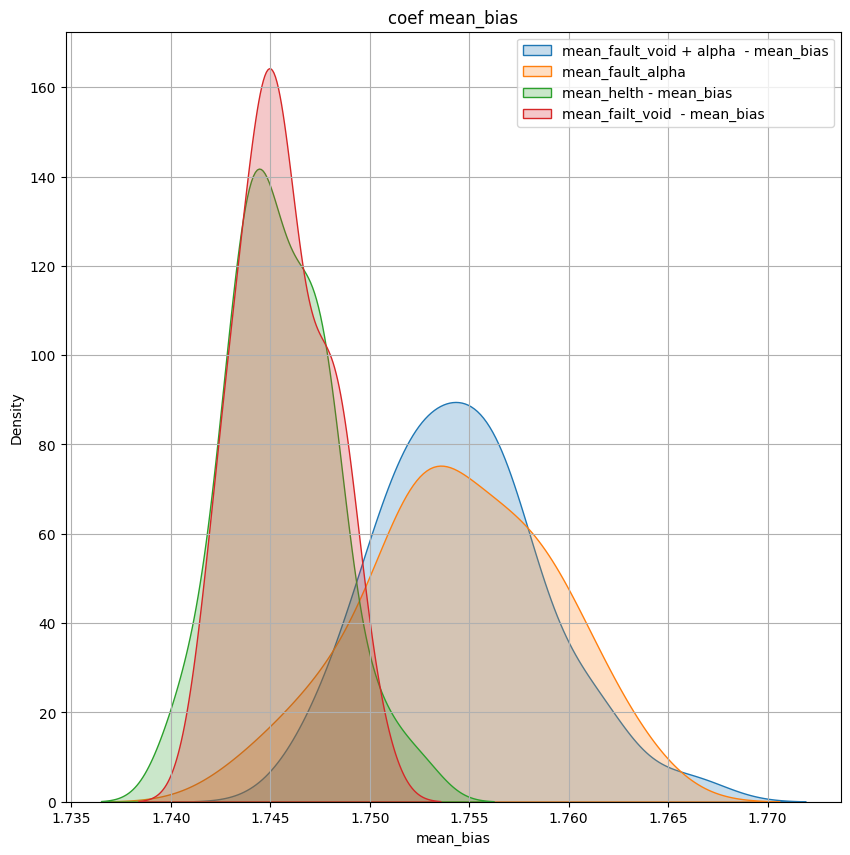

<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning

mean fault t :  0.0  - mean fault :  0.0  - mean health :  0.0


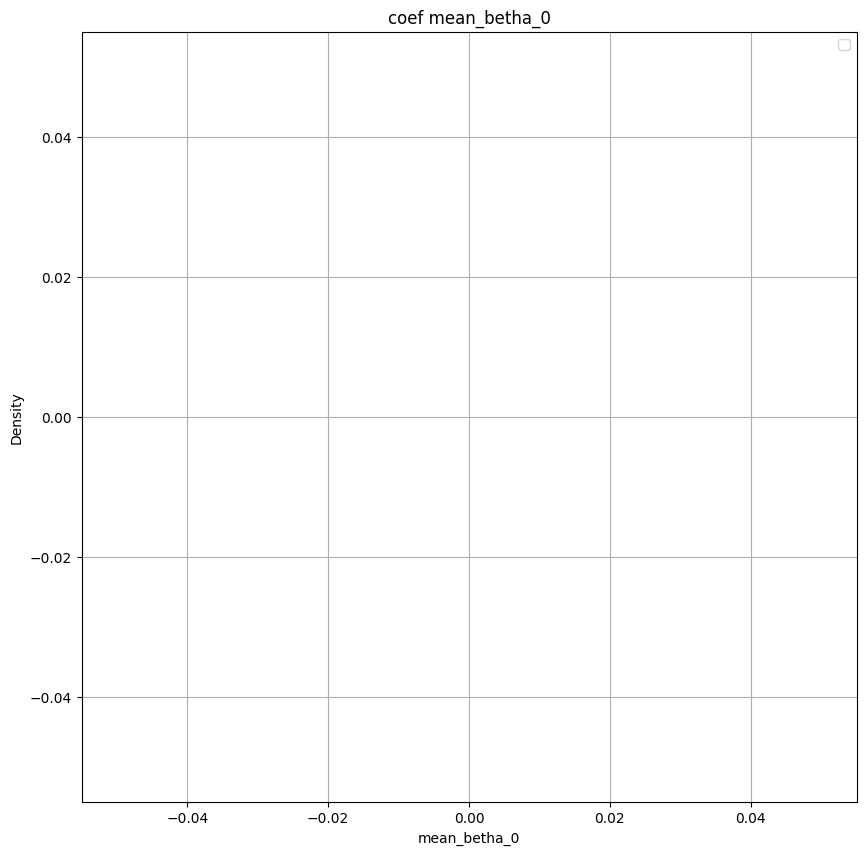

mean fault t :  -1.0640762344137134  - mean fault :  -1.0686536817056702  - mean health :  -1.0509078353161576


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

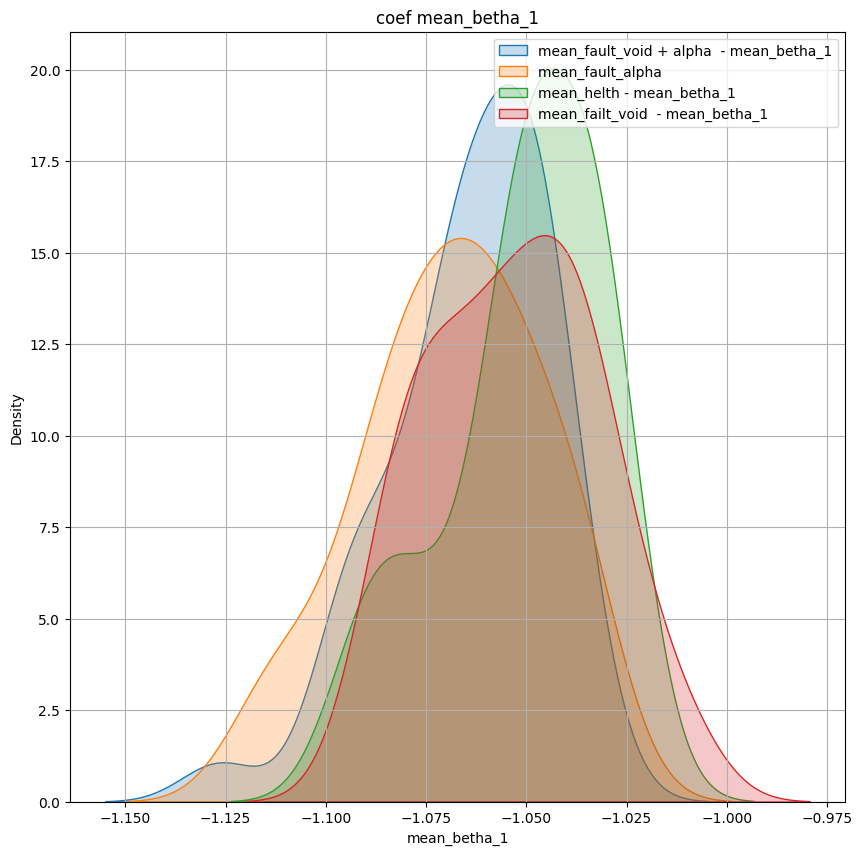

mean fault t :  -0.07203880069689034  - mean fault :  -0.07360263935349838  - mean health :  -0.07226370150004784


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

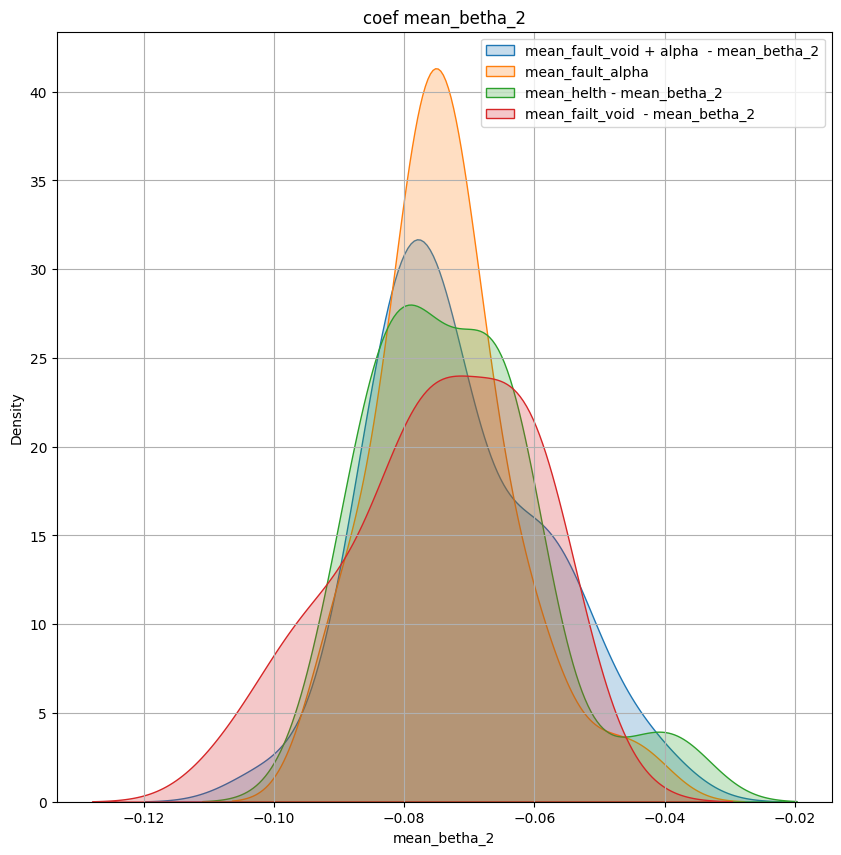

mean fault t :  2.810618827930381  - mean fault :  2.8153107966304325  - mean health :  2.785994105662337


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

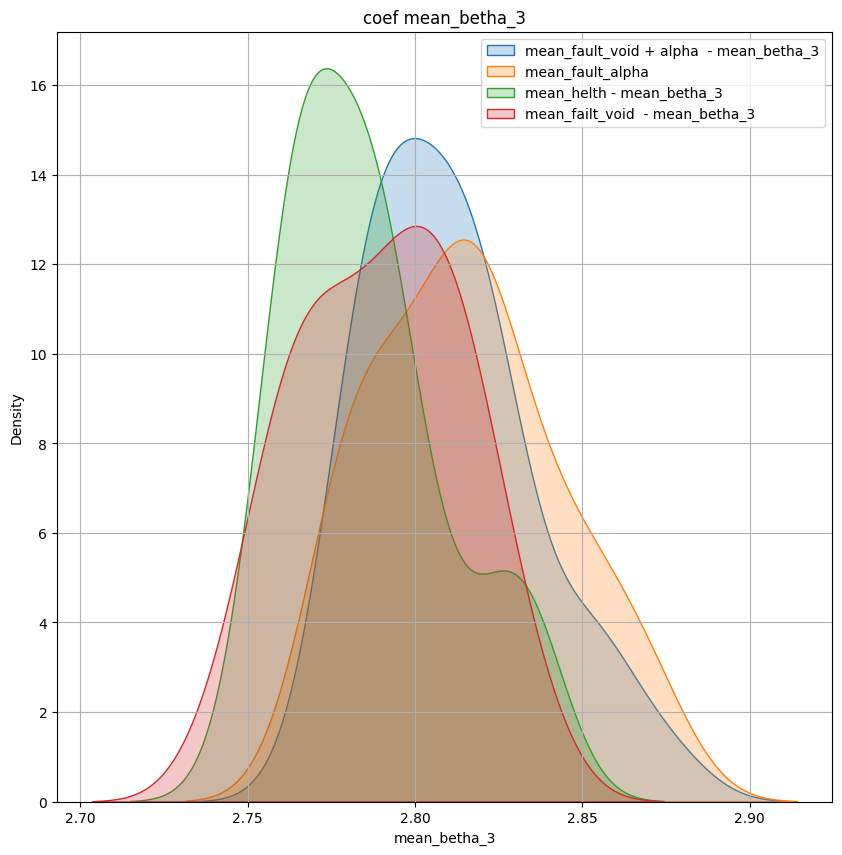

mean fault t :  0.0866360267821434  - mean fault :  0.08747858526527515  - mean health :  0.08517715705213882


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

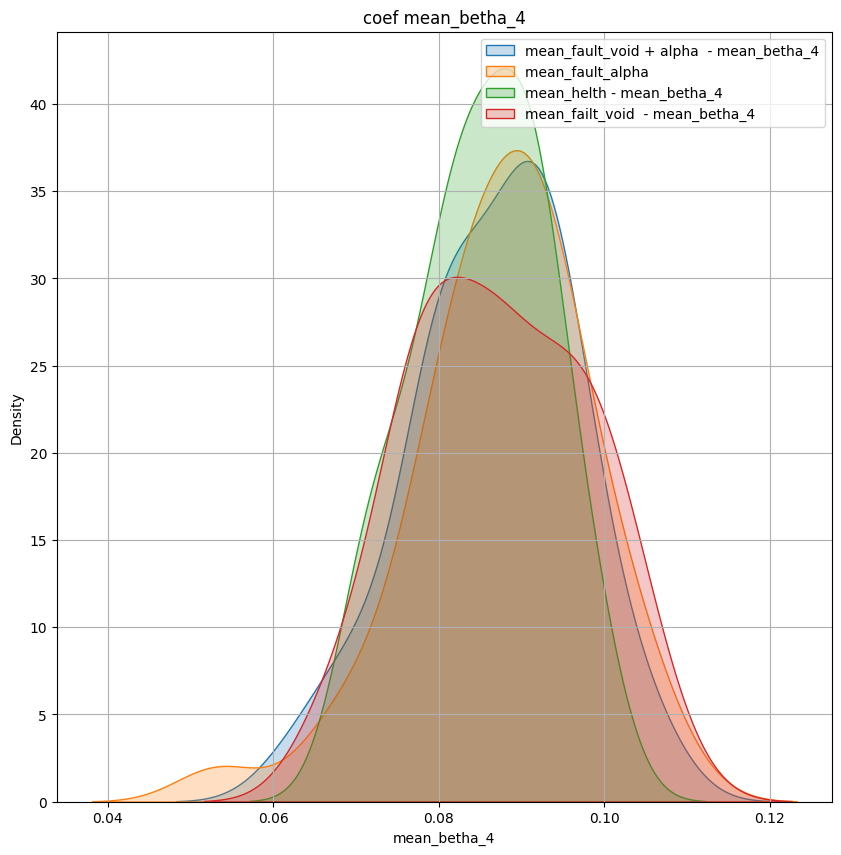

mean fault t :  -0.014559502294770904  - mean fault :  -0.01564184876577133  - mean health :  -0.015899238684106105


<ipython-input-11-96ead9510f57>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
<ipython-input-11-96ead9510f57>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
<ipython-input-11-96ead9510f57>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
<ipython-input-11-96ead9510f57>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This 

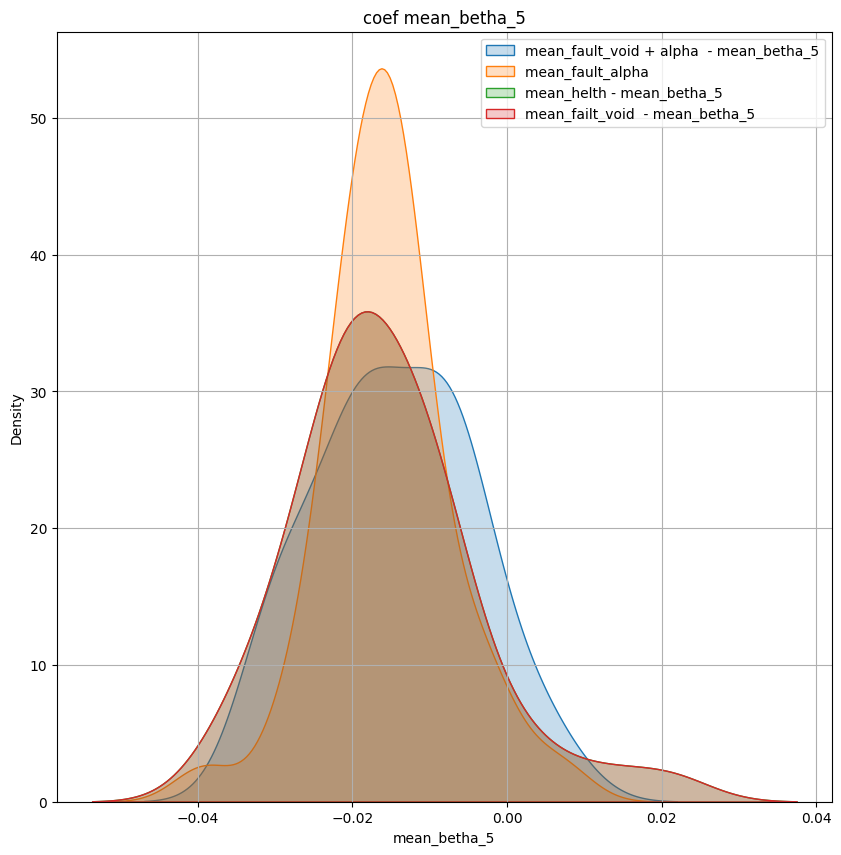

In [11]:
for element in check_columns :
  fig = plt.figure(figsize = (10 , 10 ))
  ax0 = fig.add_subplot(111 )
  print("mean fault t : " , df_fault_t_mean_and_std[element].mean() , " - mean fault : " , df_fault_mean_and_std[element].mean() , " - mean health : " , df_health_mean_and_std[element].mean() )
  sns.kdeplot( df_fault_t_mean_and_std[element]  , label=f'mean_fault_void + alpha  - {element}'  , shade=True )
  sns.kdeplot( df_fault_mean_and_std[element] , label=f'mean_fault_alpha '  , shade=True  )
  sns.kdeplot(df_health_mean_and_std[element] , label=f'mean_helth - {element} ' ,  shade=True  )
  sns.kdeplot(df_health_t_mean_and_std[element] , label=f'mean_failt_void  - {element} ' ,  shade=True  )
  plt.legend()
  plt.title(f"coef {element}")
  plt.grid()
  plt.show()

In [12]:
df_result = pd.DataFrame(total_simulation)


In [13]:
df_result.head(5)

bias_correlation  betha_0_correlation  betha_1_correlation  \
0          0.012344                  NaN            -0.027727   
1          0.004990                  NaN             0.013395   
2          0.011378                  NaN            -0.044905   
3          0.000525                  NaN             0.061414   
4          0.015171                  NaN            -0.072888   

   betha_2_correlation  betha_3_correlation  betha_4_correlation  \
0             0.053886             0.028491            -0.066947   
1             0.037267            -0.011674            -0.033304   
2            -0.022195             0.061262             0.061309   
3            -0.042039            -0.060289            -0.016803   
4            -0.055444             0.088108             0.022110   

   betha_5_correlation  alpha  flap  accuracy_nav  ...  n_estimators_RF  \
0             0.027624  0.000     1        0.4250  ...              500   
1             0.023970  0.000     2        0.4250  ...              500   
2             0.013481  0.000     3        0.4500  ...              500   
3            -0.097884  0.000     4        0.4375  ...              200   
4            -0.082908  0.001     1        0.4875  ...              500   

   max_features_RF max_depth_RF  criterion_RF accuracy_extra_classifier  \
0             sqrt            4       entropy                    0.4000   
1             sqrt            4          gini                    0.4750   
2             sqrt            6       entropy                    0.4375   
3             sqrt            5       entropy                    0.4375   
4             sqrt            8          gini                    0.4500   

   accuracy_svc_  C_svc  kernel_svc gamma_svc     ann  
0         0.5000   1000         rbf     0.100  0.4250  
1         0.4500   1000         rbf     0.001  0.5000  
2         0.4000      1         rbf     0.100  0.4125  
3         0.4875   1000         rbf     0.001  0.5125  
4         0.5250    100         rbf     0.100  0.4750  

[5 rows x 21 columns]

In [46]:
df_svc_group = df_result.groupby(['alpha' , 'flap' , 'kernel_svc']).agg({'accuracy_svc_' : ['mean'] })

In [47]:
df_svc_group

accuracy_svc_
                               mean
alpha flap kernel_svc              
0.000 1    rbf               0.5000
      2    rbf               0.4500
      3    rbf               0.4000
      4    rbf               0.4875
0.001 1    rbf               0.5250
      2    rbf               0.5250
      3    linear            0.5125
      4    rbf               0.5125
0.002 1    rbf               0.4750
      2    rbf               0.5875
      3    rbf               0.4875
      4    rbf               0.4875
0.003 1    rbf               0.5125
      2    rbf               0.5750
      3    rbf               0.3625
      4    linear            0.5000
0.004 1    rbf               0.5125
      2    rbf               0.4875
      3    rbf               0.5375
      4    linear            0.4750
0.005 1    rbf               0.3750
      2    linear            0.3875
      3    linear            0.4500
      4    rbf               0.5750
0.006 1    linear            0.4375
      2    rbf               0.4000
      3    rbf               0.4625
      4    rbf               0.4875
0.007 1    rbf               0.4750
      2    rbf               0.5125
      3    linear            0.4000
      4    rbf               0.4500
0.008 1    rbf               0.5125
      2    linear            0.4500
      3    rbf               0.4125
      4    rbf               0.5500
0.009 1    rbf               0.5500
      2    rbf               0.5625
      3    rbf               0.4375
      4    linear            0.4750

In [51]:
df_svc_group.plot(x = 'alpha' , y = 'accuracy_svc_mean')

KeyError: 'alpha'

IndexError: single positional indexer is out-of-bounds

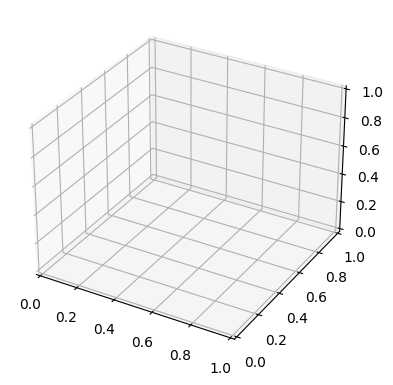

In [48]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_svc_group.iloc[: , 0 ] , df_svc_group.iloc[: , 1 ] , df_svc_group[: , 3])
plt.legend()
plt.grid()
plt.show()

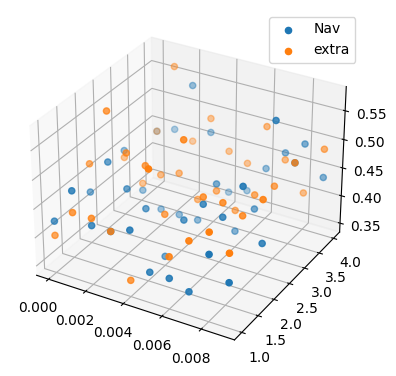

In [30]:
fig = plt.figure(figsize = (10 , 10 ))
ax0 = fig.add_subplot( 1 , 2 , 1 , projection = "3d" )
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 9] , label='Nav')
ax0.scatter3D(df_result.iloc[ : , 7 ] ,df_result.iloc[ : , 8 ] , df_result.iloc[ : , 15] , label='extra')
plt.legend()
plt.grid()
plt.show()

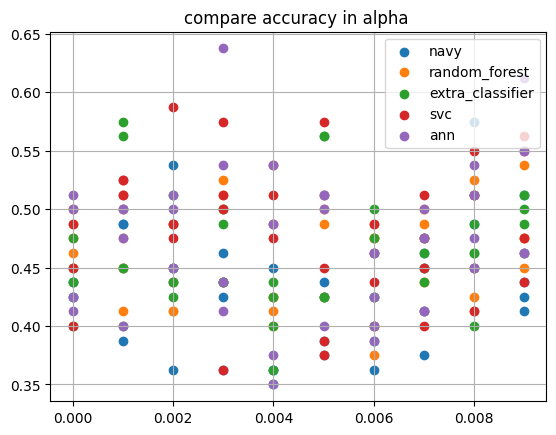

In [14]:
plt.scatter( df_result['alpha'] , df_result['accuracy_nav'] , label = 'navy')
plt.scatter( df_result['alpha'] , df_result['accuracy_random_forest'] , label = 'random_forest')
plt.scatter( df_result['alpha'] , df_result['accuracy_extra_classifier'] , label = 'extra_classifier')
plt.scatter( df_result['alpha'] , df_result['accuracy_svc_'] , label = 'svc')
plt.scatter( df_result['alpha'] , df_result['ann'] , label = 'ann')
plt.title("compare accuracy in alpha ")
plt.legend()
plt.grid()
plt.show()

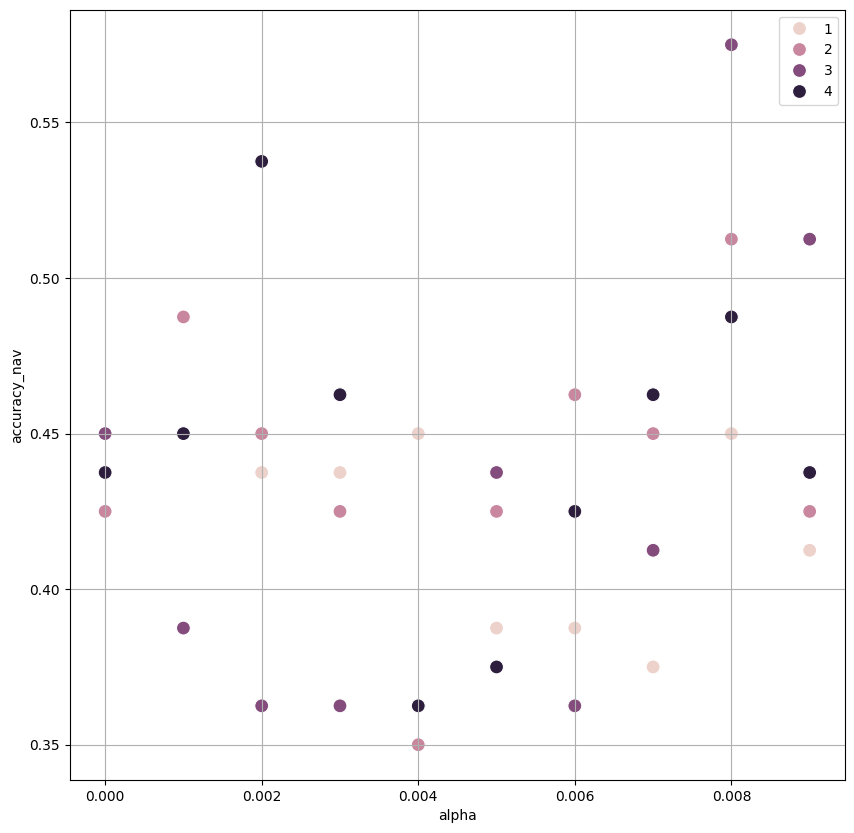

In [15]:
plt.figure(figsize = (10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="accuracy_nav", hue="flap" , s = 100  )
plt.legend()
plt.grid()
plt.show()

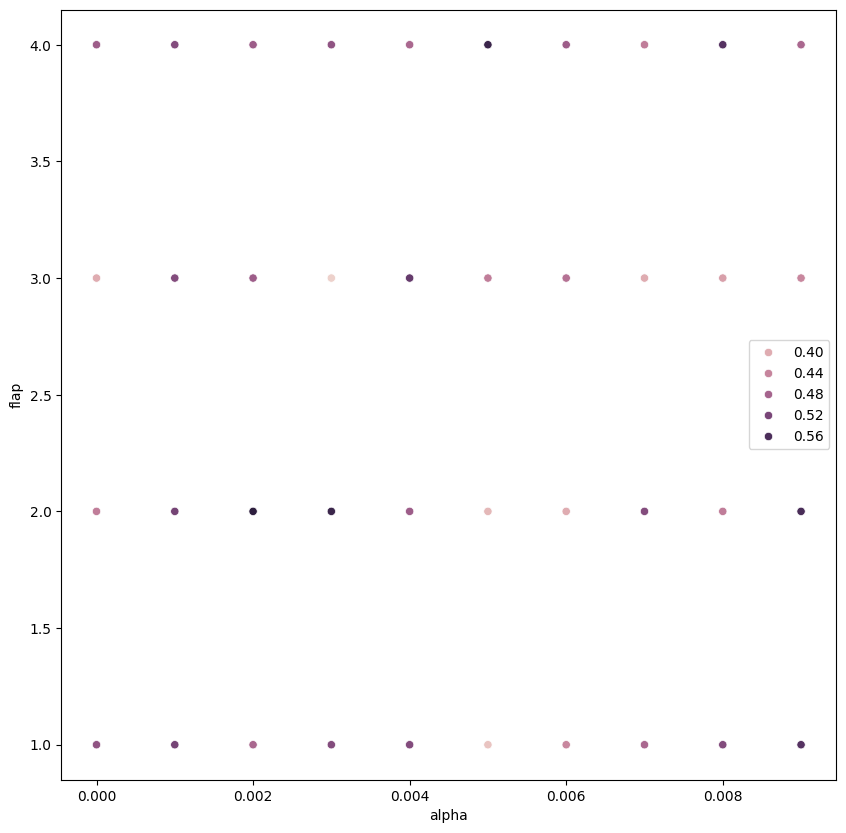

In [16]:
plt.figure(figsize=(10 , 10 ))
sns.scatterplot(data=df_result, x="alpha", y="flap", hue="accuracy_svc_", hue_order = ["linear" , "rbf" ] )
plt.legend()
plt.show()

In [17]:
df_result['flap'].unique()

array([1, 2, 3, 4])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

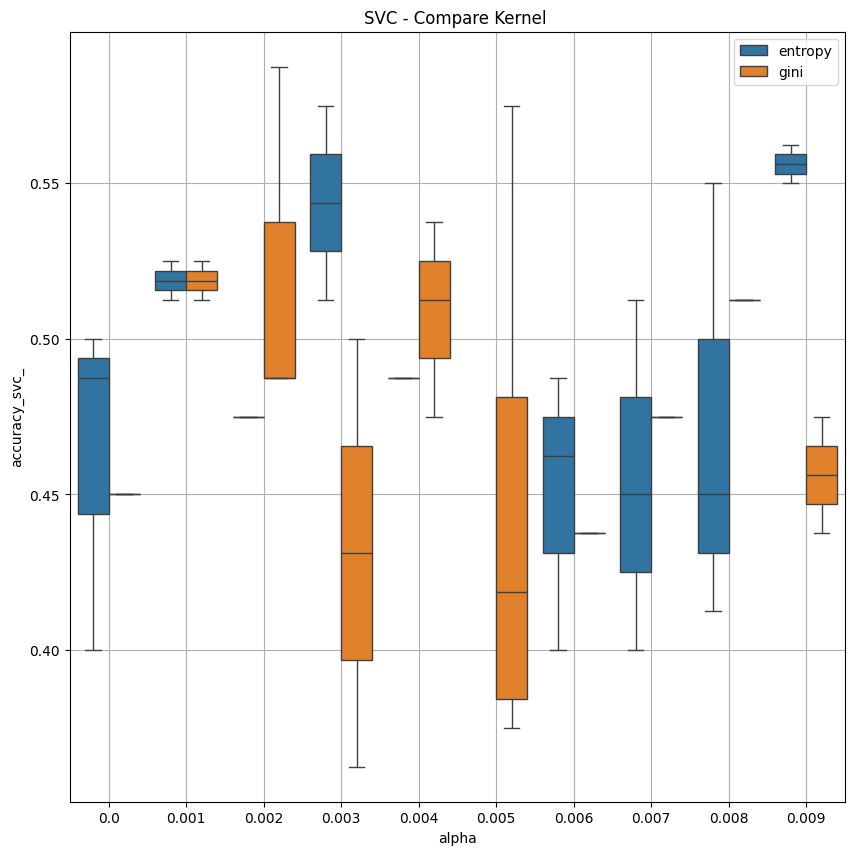

In [18]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='criterion_RF', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

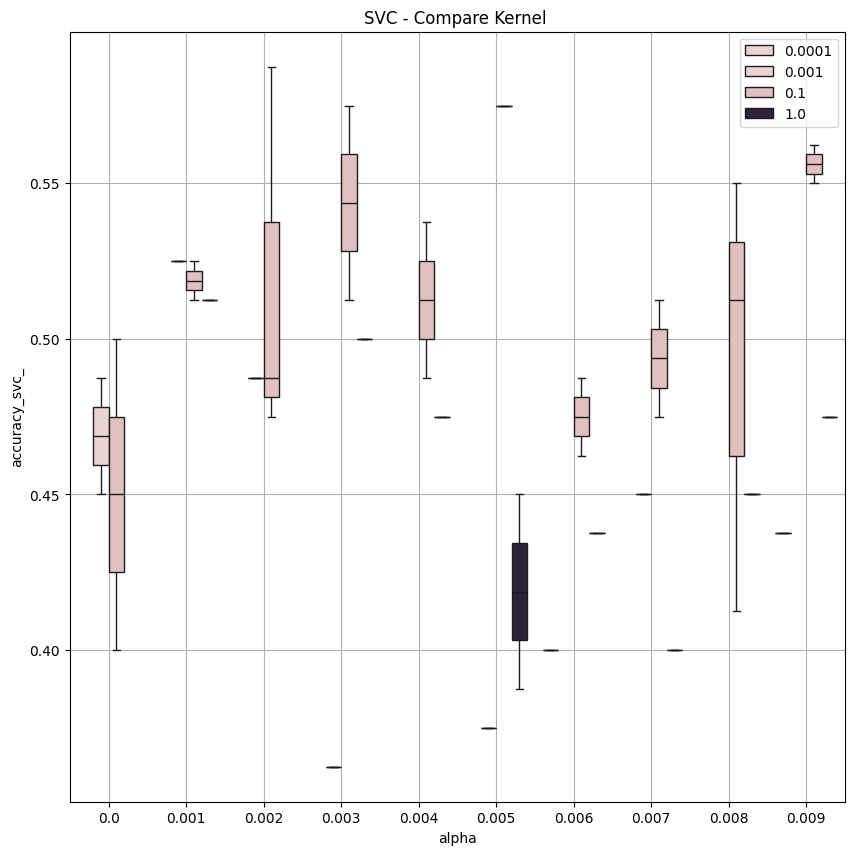

In [19]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='gamma_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

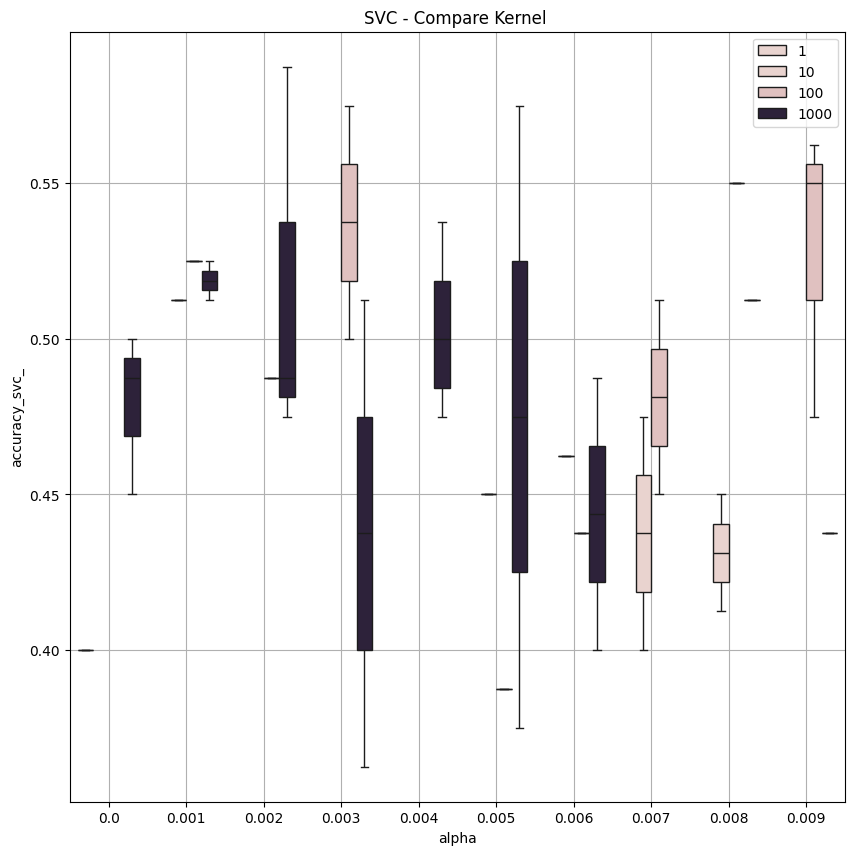

In [20]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_svc_" , hue='C_svc', data = df_result )
plt.title("SVC - Compare Kernel " )
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


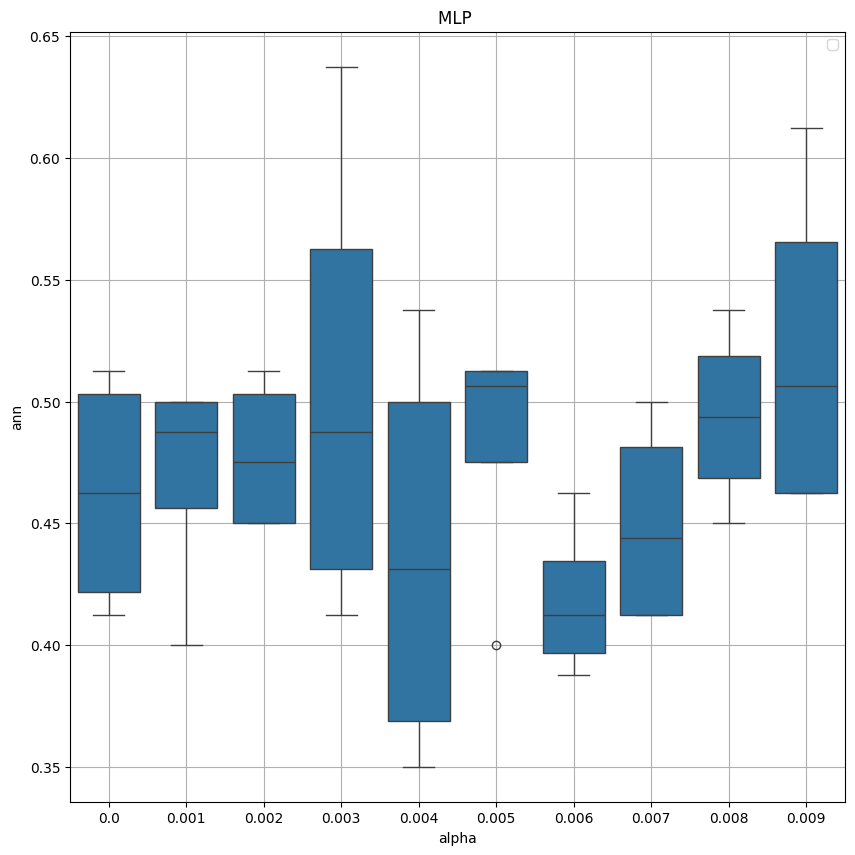

In [22]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="ann" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
accuracy_nav

In [ ]:
plt.figure(figsize = (10 , 10 )  )
sns.boxplot(x="alpha", y="accuracy_nav" , hue="flap" , data = df_result )
plt.title("MLP " )
plt.legend()
plt.grid()
plt.show()
